In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#importing packages
from sklearn.metrics import *
from matplotlib import pyplot as plt
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [2]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [4]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

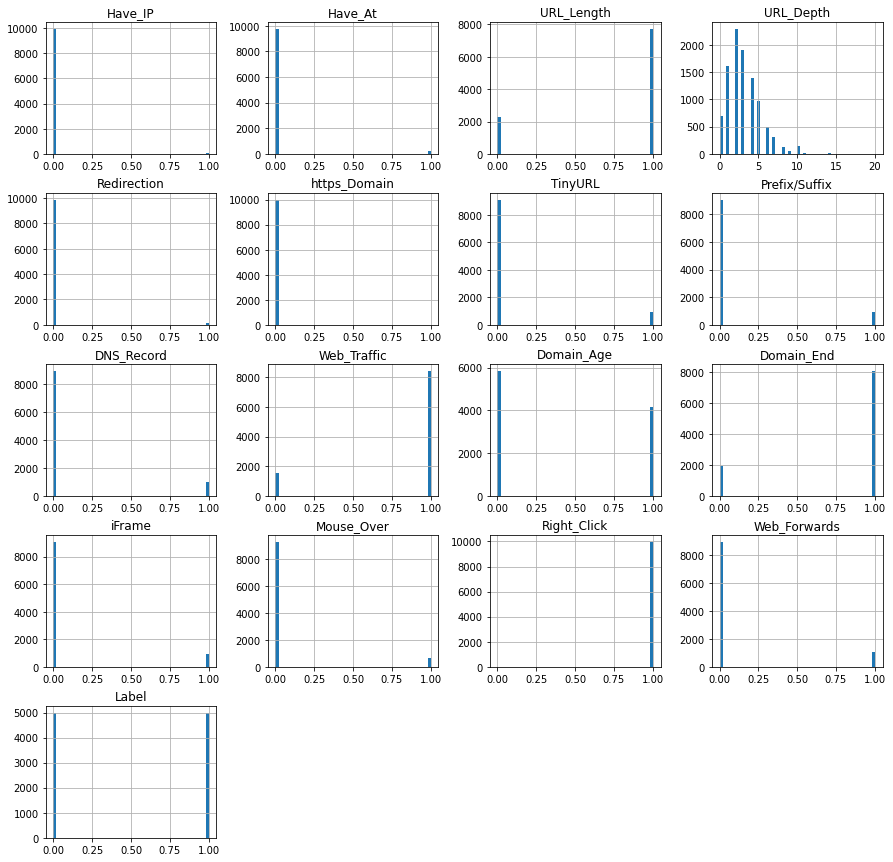

In [6]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

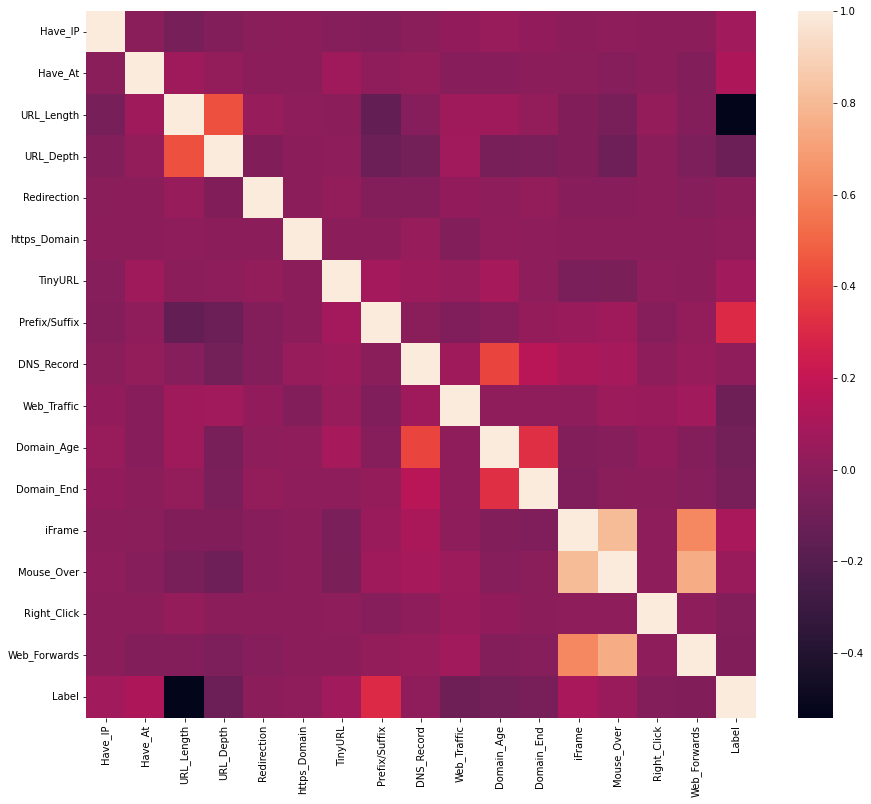

In [7]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [8]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [9]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [10]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data. 

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,1,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,0


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [12]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [13]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, random_state = 12)
X_train.shape, X_test.shape

((7500, 16), (2500, 16))

## **7. Machine Learning Models & Training**



In [14]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [15]:
#confusion matrix
def confsuion_tree(y_test,y_pred):
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
     for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

In [16]:
# Precision
def Presion(y_test, y_pred):
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    return precision_score(y_test, y_pred)

In [17]:
# Recall
def Recall(y_test, y_pred):
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    return recall_score(y_test, y_pred)


In [18]:
def ROC(modle):
    pred_prob1 = modle.predict_proba(X_test)

    print("the roc auc is ",roc_auc_score(y_test, pred_prob1[:,1]))

    fpr, tpr, _ = roc_curve(y_test, pred_prob1[:,1])


    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr, tpr, linestyle='--',color='orange',label="modle")

    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();

In [19]:
def PR_Curve(y_test,y_score,recall,precision):
  precision, recall, thresholds = precision_recall_curve(y_test, y_score)
#create precision recall curve
  fig, ax = plt.subplots()
  ax.plot(recall, precision, color='purple')

#add axis labels to plot
  ax.set_title('Precision-Recall Curve')
  ax.set_ylabel('Precision')
  ax.set_xlabel('Recall')

#display plot
  plt.show()
  

### **7.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [20]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

def depth(n):
  # instantiate the model 
  tree = DecisionTreeClassifier(max_depth = n)
  # fit the model 
  tree.fit(X_train, y_train)

  return tree

Decision Tree: Accuracy on training Data: 0.779
Decision Tree: Accuracy on test Data: 0.780


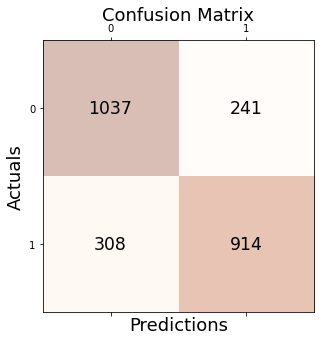

Precision: 0.791
Recall: 0.748
the roc auc is  0.8316163118006091


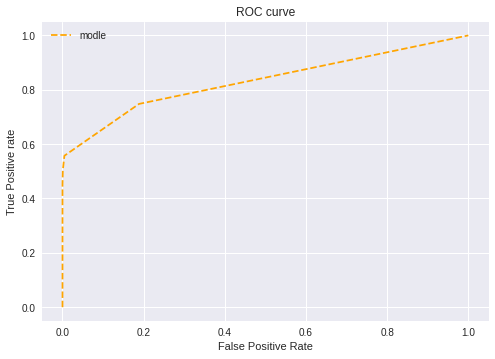

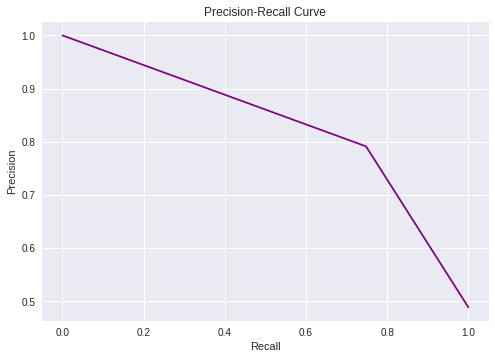

In [21]:
#decision tree with maximum depth of 3
tree=depth(3)
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)


#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))


#precision and recall
confsuion_tree(y_test,y_test_tree)
precision=Presion(y_test,y_test_tree)
recall=Recall(y_test,y_test_tree)
              
#Roc
ROC(tree)

#PR curve
PR_Curve(y_test,y_test_tree,recall,precision)





Decision Tree: Accuracy on training Data: 0.812
Decision Tree: Accuracy on test Data: 0.817


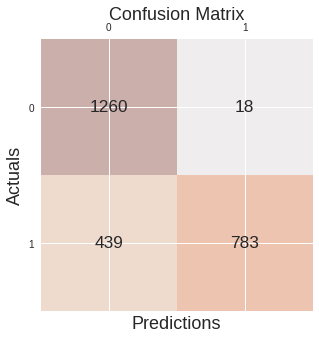

Precision: 0.978
Recall: 0.641
the roc auc is  0.8538665160630998


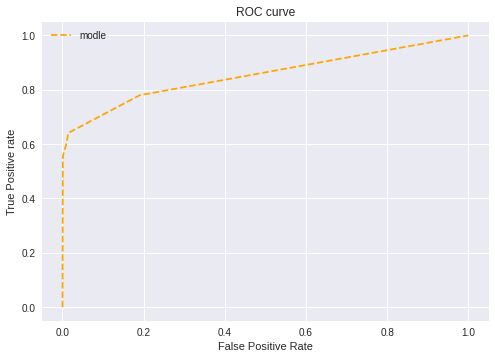

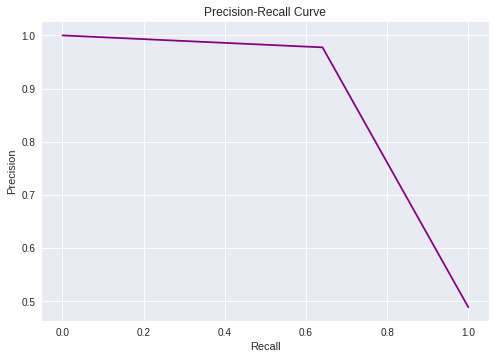

In [22]:
#decision tree with maximum depth of 5
tree=depth(5)
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)


#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))


#precision and recall
confsuion_tree(y_test,y_test_tree)
precision=Presion(y_test,y_test_tree)
recall=Recall(y_test,y_test_tree)
              
#Roc
ROC(tree)

#PR curve
PR_Curve(y_test,y_test_tree,recall,precision)

Decision Tree: Accuracy on training Data: 0.825
Decision Tree: Accuracy on test Data: 0.829


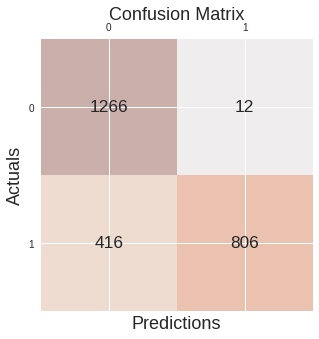

Precision: 0.985
Recall: 0.660
the roc auc is  0.8774806046681983


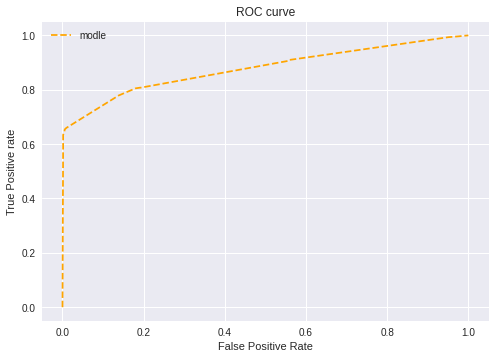

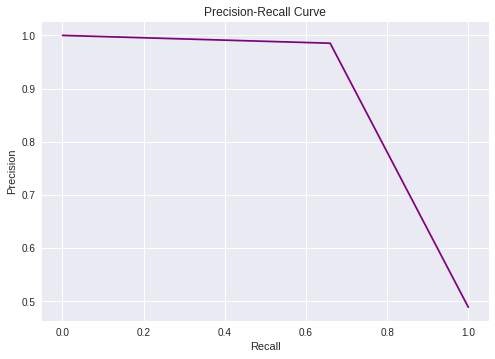

In [23]:
#decision tree with maximum depth of 8
tree=depth(8)
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)


#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))


#precision and recall
confsuion_tree(y_test,y_test_tree)
precision=Presion(y_test,y_test_tree)
recall=Recall(y_test,y_test_tree)
              
#Roc
ROC(tree)

#PR curve
PR_Curve(y_test,y_test_tree,recall,precision)


**Performance Evaluation:**

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1278
           1       0.77      0.83      0.80      1222

    accuracy                           0.80      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.80      0.80      0.80      2500



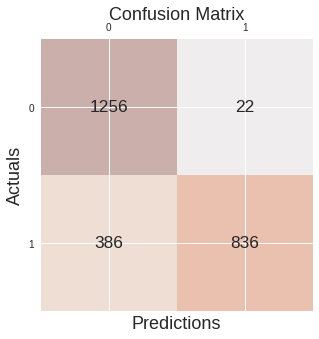

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1278
           1       0.82      0.81      0.82      1222

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500



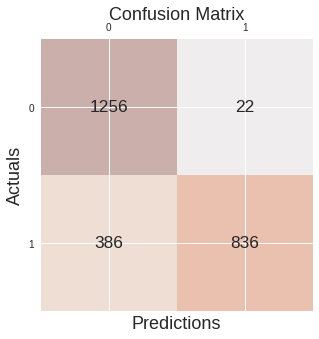

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1278
           1       0.82      0.81      0.82      1222

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500



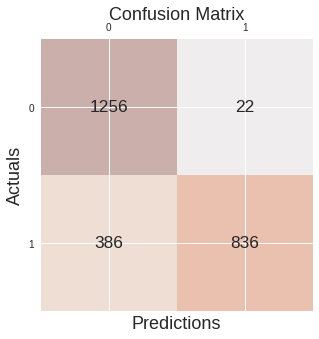

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1278
           1       0.97      0.68      0.80      1222

    accuracy                           0.84      2500
   macro avg       0.87      0.83      0.83      2500
weighted avg       0.87      0.84      0.83      2500



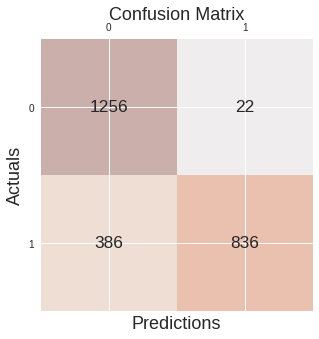

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1278
           1       0.97      0.68      0.80      1222

    accuracy                           0.84      2500
   macro avg       0.87      0.83      0.83      2500
weighted avg       0.87      0.84      0.83      2500



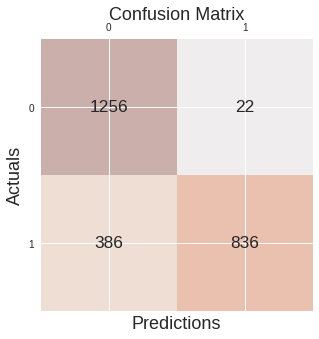

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1278
           1       0.98      0.68      0.80      1222

    accuracy                           0.84      2500
   macro avg       0.87      0.83      0.83      2500
weighted avg       0.87      0.84      0.83      2500



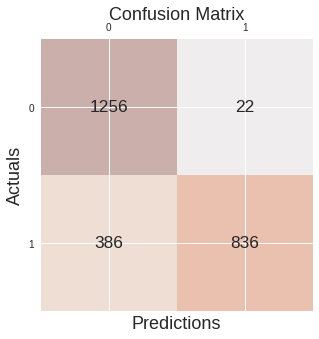

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1278
           1       0.99      0.67      0.80      1222

    accuracy                           0.84      2500
   macro avg       0.87      0.83      0.83      2500
weighted avg       0.87      0.84      0.83      2500



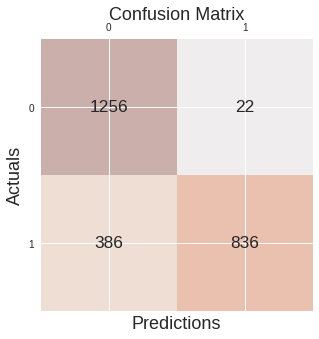

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1278
           1       0.99      0.67      0.80      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.83      0.83      2500
weighted avg       0.87      0.83      0.83      2500



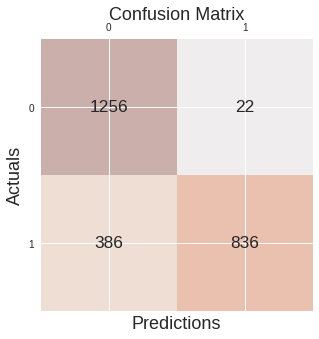

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1278
           1       1.00      0.66      0.79      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.83      0.82      2500
weighted avg       0.87      0.83      0.83      2500



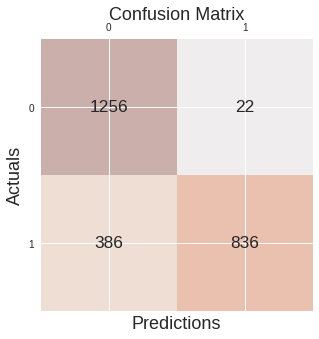

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1278
           1       1.00      0.65      0.79      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.82      0.82      2500
weighted avg       0.87      0.83      0.82      2500



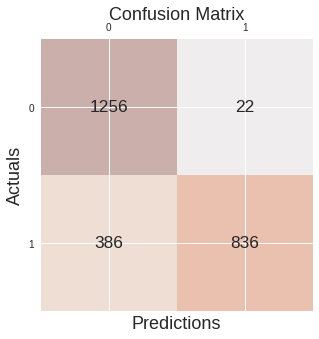

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1278
           1       1.00      0.64      0.78      1222

    accuracy                           0.82      2500
   macro avg       0.87      0.82      0.82      2500
weighted avg       0.87      0.82      0.82      2500



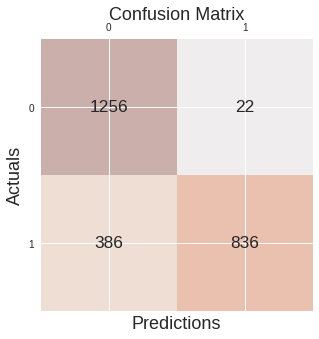

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1278
           1       1.00      0.64      0.78      1222

    accuracy                           0.82      2500
   macro avg       0.87      0.82      0.82      2500
weighted avg       0.87      0.82      0.82      2500



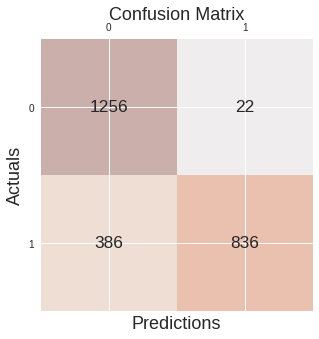

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1278
           1       1.00      0.63      0.78      1222

    accuracy                           0.82      2500
   macro avg       0.87      0.82      0.81      2500
weighted avg       0.87      0.82      0.81      2500



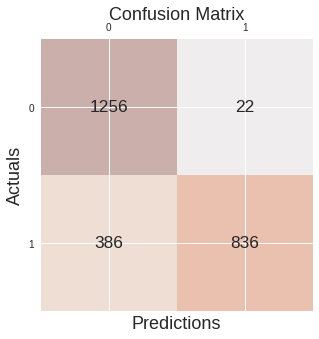

In [24]:
#decision tree with maximum depth of 10
tree=depth(10)
#predicting the target value from the model for the samples


list1=[0.3,0.35,0.4,0.45,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]

for threshold in list1:
  y_pred = (tree.predict_proba(X_test)[:, 1] > threshold).astype('float')
  y_test_tree = tree.predict(X_test)
  y_train_tree = tree.predict(X_train)
  print(classification_report(y_test, y_pred,))
  confsuion_tree(y_test,y_test_tree)



**Storing the results:**

In [25]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)


Conclusion: Decision tree with 10 maximum depth yield the best performance.

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [26]:

def Random(n):
# instantiate the model
  forest = RandomForestClassifier(max_depth=n)

# fit the model 
  forest.fit(X_train, y_train)
  return forest

def start(tree):
  for threshold in list1:
    y_pred = (tree.predict_proba(X_test)[:, 1] > threshold).astype('float')
    y_test_tree = tree.predict(X_test)
    y_train_tree = tree.predict(X_train)
    confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred,))
    confsuion_tree(y_test,y_test_tree)

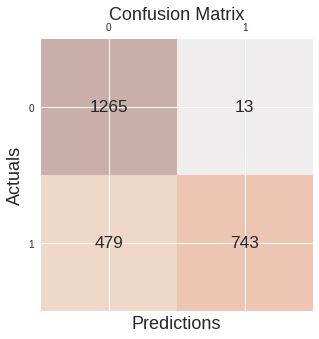

Precision: 0.983
Recall: 0.608
Random forest: Accuracy on training Data: 0.789
Random forest: Accuracy on test Data: 0.803
the roc auc is  0.8650071459855697


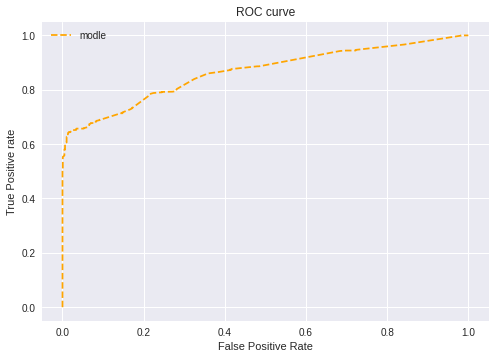

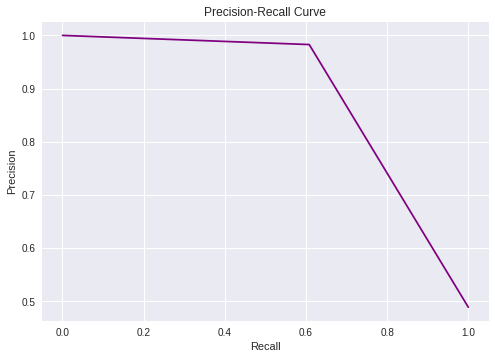

In [27]:
forest=Random(3)

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

#precison/recall
confsuion_tree(y_test,y_test_forest)
precision=Presion(y_test,y_test_forest)
recall=Recall(y_test,y_test_forest)

#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
#ROC
ROC(forest)
#RR curve
PR_Curve(y_test,y_test_forest,recall,precision)

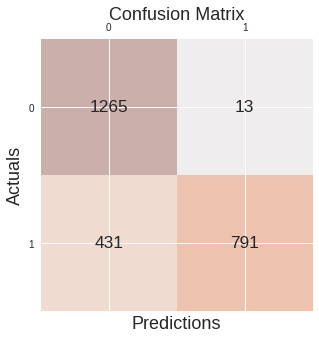

Precision: 0.984
Recall: 0.647
Random forest: Accuracy on training Data: 0.819
Random forest: Accuracy on test Data: 0.822
the roc auc is  0.885435636184812


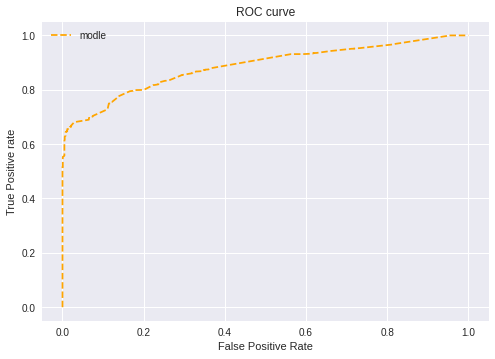

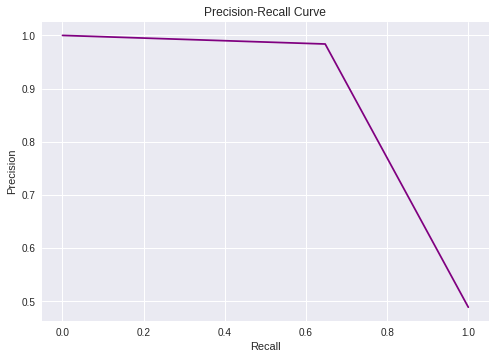

In [28]:
forest=Random(5)
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

#precison/recall
confsuion_tree(y_test,y_test_forest)
precision=Presion(y_test,y_test_forest)
recall=Recall(y_test,y_test_forest)

#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
#ROC
ROC(forest)
#RR curve
PR_Curve(y_test,y_test_forest,recall,precision)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1278
           1       0.82      0.85      0.83      1222

    accuracy                           0.83      2500
   macro avg       0.84      0.84      0.83      2500
weighted avg       0.84      0.83      0.83      2500



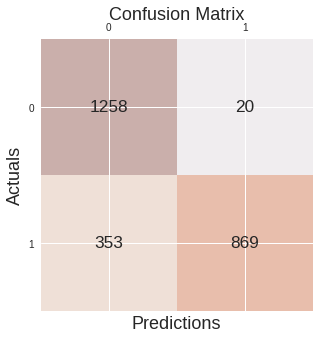

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1278
           1       0.82      0.85      0.84      1222

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500



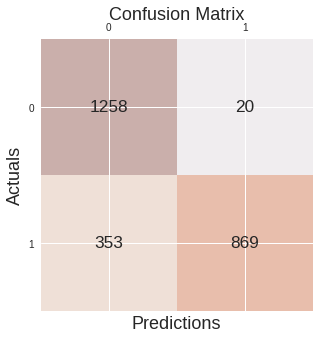

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1278
           1       0.88      0.83      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



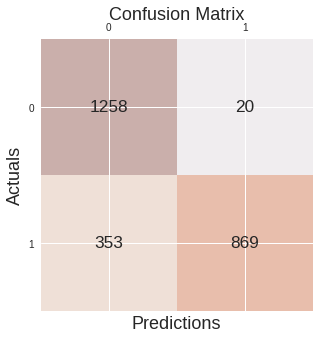

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1278
           1       0.94      0.77      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.86      0.86      2500
weighted avg       0.88      0.86      0.86      2500



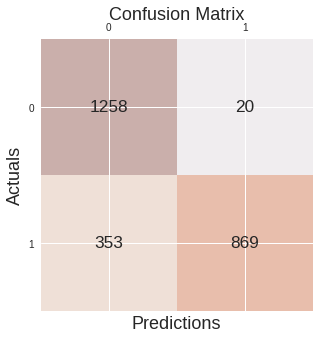

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1278
           1       0.98      0.71      0.82      1222

    accuracy                           0.85      2500
   macro avg       0.88      0.85      0.85      2500
weighted avg       0.88      0.85      0.85      2500



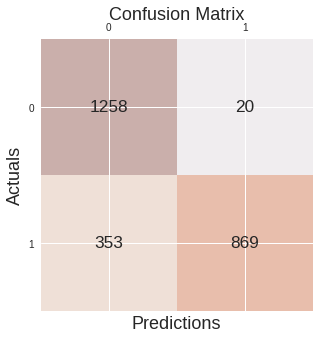

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1278
           1       0.98      0.69      0.81      1222

    accuracy                           0.84      2500
   macro avg       0.88      0.84      0.84      2500
weighted avg       0.87      0.84      0.84      2500



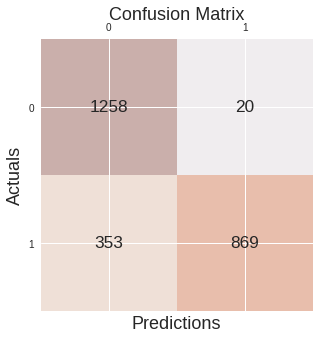

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1278
           1       0.98      0.69      0.81      1222

    accuracy                           0.84      2500
   macro avg       0.88      0.84      0.84      2500
weighted avg       0.87      0.84      0.84      2500



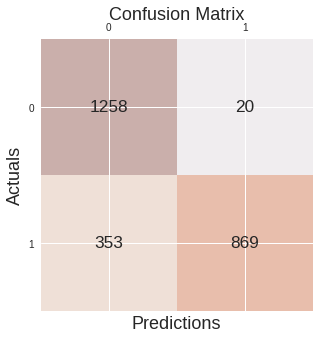

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1278
           1       0.99      0.68      0.80      1222

    accuracy                           0.84      2500
   macro avg       0.88      0.83      0.83      2500
weighted avg       0.87      0.84      0.83      2500



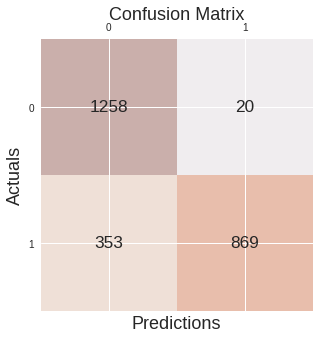

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1278
           1       1.00      0.66      0.80      1222

    accuracy                           0.83      2500
   macro avg       0.88      0.83      0.83      2500
weighted avg       0.87      0.83      0.83      2500



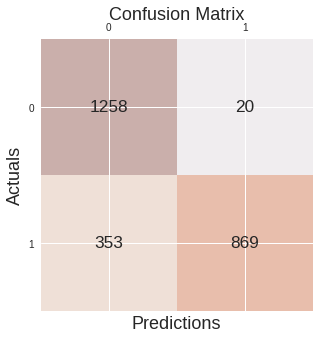

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1278
           1       1.00      0.66      0.79      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.83      0.82      2500
weighted avg       0.87      0.83      0.83      2500



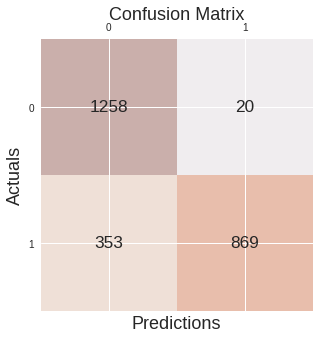

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1278
           1       1.00      0.63      0.77      1222

    accuracy                           0.82      2500
   macro avg       0.87      0.81      0.81      2500
weighted avg       0.87      0.82      0.81      2500



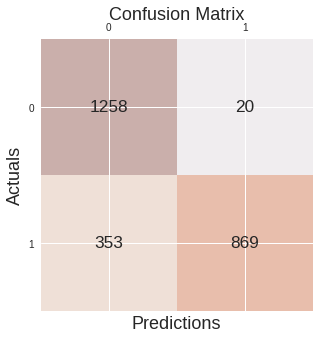

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1278
           1       1.00      0.62      0.77      1222

    accuracy                           0.82      2500
   macro avg       0.87      0.81      0.81      2500
weighted avg       0.86      0.82      0.81      2500



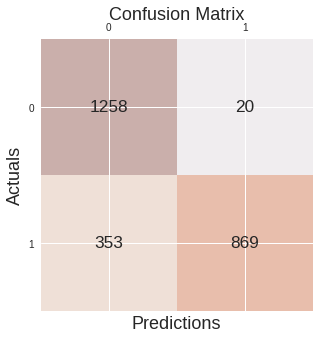

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1278
           1       1.00      0.58      0.74      1222

    accuracy                           0.80      2500
   macro avg       0.86      0.79      0.78      2500
weighted avg       0.85      0.80      0.79      2500



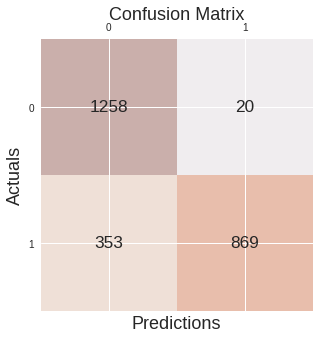

In [29]:
forest=Random(12)
#predicting the target value from the model for the samples
list1=[0.3,0.35,0.4,0.45,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]


def start(tree):
  for threshold in list1:
    y_pred = (tree.predict_proba(X_test)[:, 1] > threshold).astype('float')
    y_test_tree = tree.predict(X_test)
    y_train_tree = tree.predict(X_train)
    confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred,))
    confsuion_tree(y_test,y_test_tree)
start(forest)

**Performance Evaluation:**

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1278
           1       0.80      0.86      0.83      1222

    accuracy                           0.83      2500
   macro avg       0.83      0.83      0.83      2500
weighted avg       0.83      0.83      0.83      2500



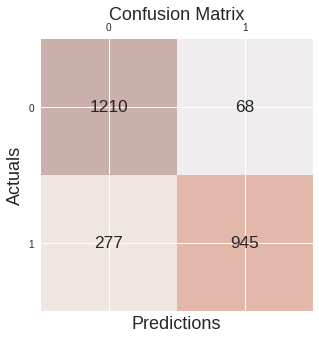

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1278
           1       0.87      0.84      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



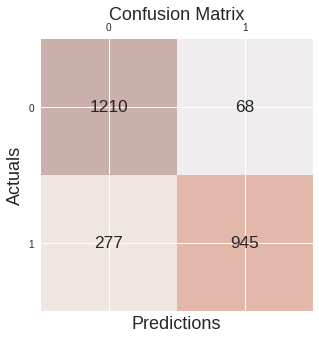

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1278
           1       0.87      0.83      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



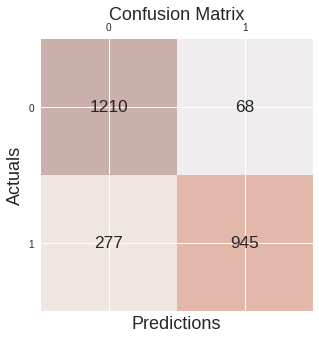

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1278
           1       0.91      0.80      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



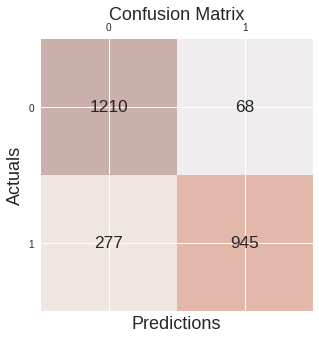

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1278
           1       0.93      0.77      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



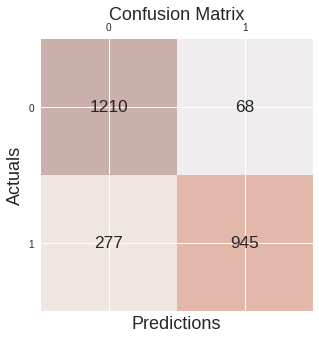

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1278
           1       0.97      0.74      0.84      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.86      0.86      2500
weighted avg       0.88      0.86      0.86      2500



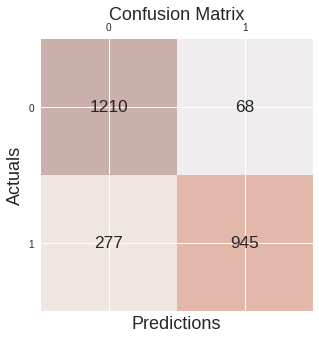

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1278
           1       0.98      0.73      0.84      1222

    accuracy                           0.86      2500
   macro avg       0.89      0.86      0.86      2500
weighted avg       0.88      0.86      0.86      2500



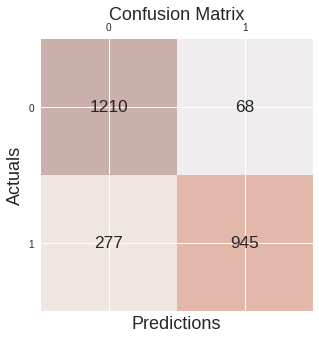

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1278
           1       0.99      0.69      0.81      1222

    accuracy                           0.84      2500
   macro avg       0.88      0.84      0.84      2500
weighted avg       0.88      0.84      0.84      2500



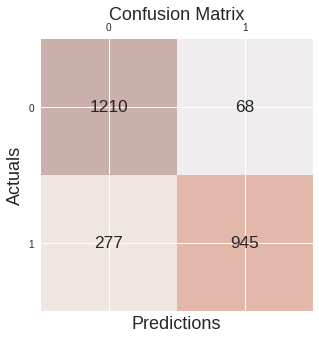

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1278
           1       0.99      0.68      0.81      1222

    accuracy                           0.84      2500
   macro avg       0.88      0.84      0.84      2500
weighted avg       0.88      0.84      0.84      2500



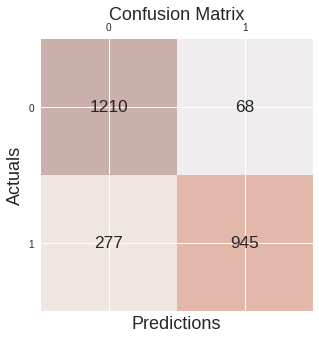

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1278
           1       0.99      0.68      0.81      1222

    accuracy                           0.84      2500
   macro avg       0.88      0.84      0.84      2500
weighted avg       0.88      0.84      0.84      2500



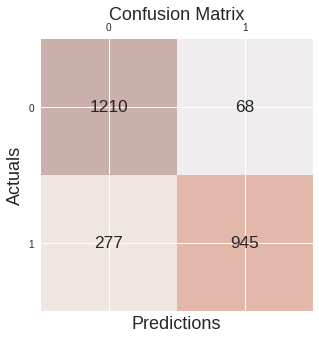

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1278
           1       0.99      0.66      0.79      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.83      0.83      2500
weighted avg       0.87      0.83      0.83      2500



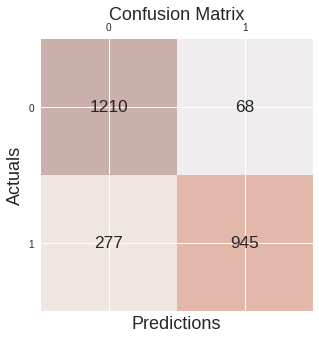

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      1278
           1       0.99      0.65      0.78      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.82      0.82      2500
weighted avg       0.87      0.83      0.82      2500



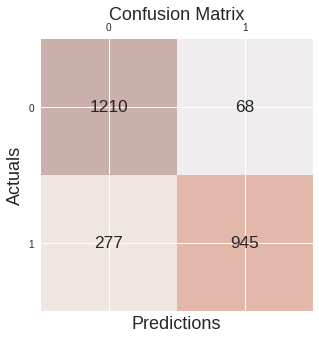

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1278
           1       1.00      0.62      0.77      1222

    accuracy                           0.82      2500
   macro avg       0.87      0.81      0.81      2500
weighted avg       0.86      0.82      0.81      2500



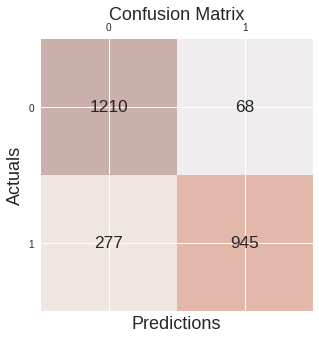

In [30]:
forest=Random(15)
#predicting the target value from the model for the samples
start(forest)


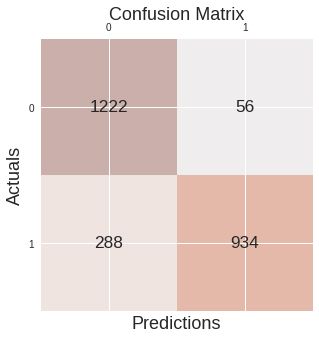

Precision: 0.943
Recall: 0.764
Random forest: Accuracy on training Data: 0.868
Random forest: Accuracy on test Data: 0.862
the roc auc is  0.9221471765673145


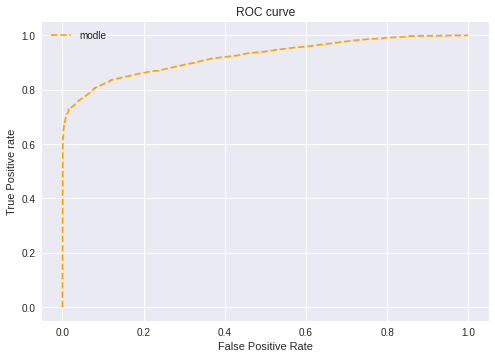

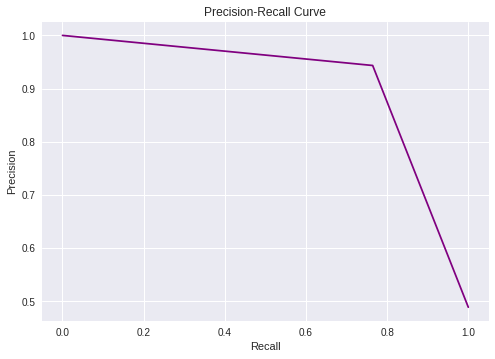

In [31]:
forest=Random(16)
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

#precison/recall
confsuion_tree(y_test,y_test_forest)
precision=Presion(y_test,y_test_forest)
recall=Recall(y_test,y_test_forest)

#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
#ROC
ROC(forest)
#RR curve
PR_Curve(y_test,y_test_forest,recall,precision)

Conclusion: Random forest modle with  maximum depth of 5  yields the best performance.

7.3. Support Vector Machines
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifie

In [32]:
#Support vector machine model
from sklearn.svm import SVC



def superVector(kernel,C,ramdom_state):
  # instantiate the model
  svm = SVC(kernel=kernel, C=C, random_state=ramdom_state,probability=True)
  #fit the model
  svm.fit(X_train, y_train)
  return svm

SVM: Accuracy on training Data: 0.516
SVM : Accuracy on test Data: 0.522


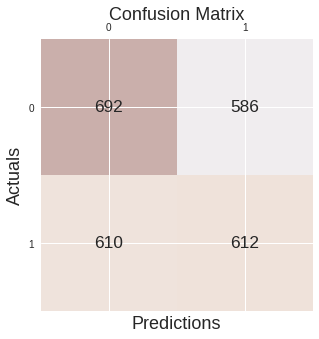

Precision: 0.511
Recall: 0.501
the roc auc is  0.5436641489233638


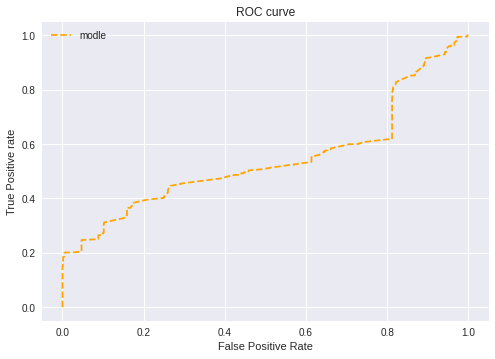

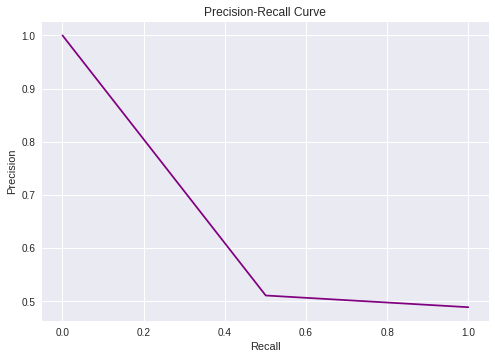

In [33]:
svm=superVector("sigmoid",1,12)
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

# Precision & recall
confsuion_tree(y_test,y_test_svm )
precision=Presion(y_test,y_test_svm)
recall=Recall(y_test,y_test_svm)

#ROC()
ROC(svm)
# PR_Curve
PR_Curve(y_test,y_test_svm,recall,precision)


SVM: Accuracy on training Data: 0.799
SVM : Accuracy on test Data: 0.813


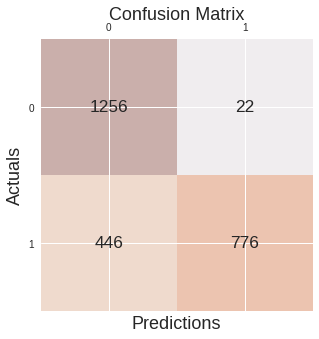

Precision: 0.972
Recall: 0.635
the roc auc is  0.8621926137658831


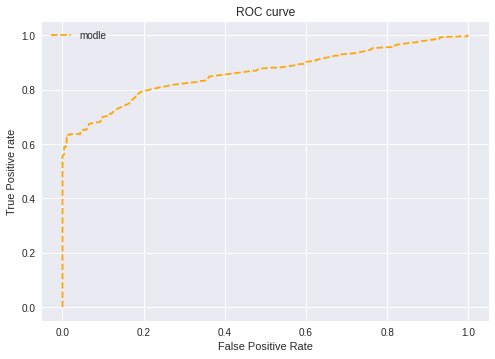

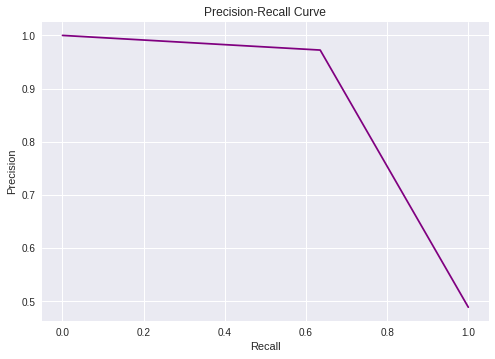

In [34]:
svm=superVector("linear",1,12)
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

# Precision & recall
confsuion_tree(y_test,y_test_svm )
precision=Presion(y_test,y_test_svm)
recall=Recall(y_test,y_test_svm)
#ROC
ROC(svm)
# PR_Curve
PR_Curve(y_test,y_test_svm,recall,precision)


SVM: Accuracy on training Data: 0.799
SVM : Accuracy on test Data: 0.813


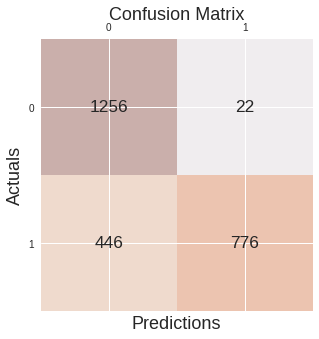

Precision: 0.972
Recall: 0.635
the roc auc is  0.8641308663034765


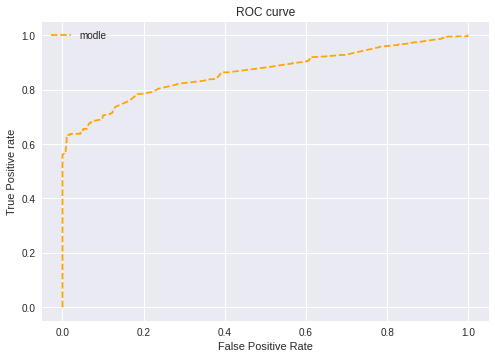

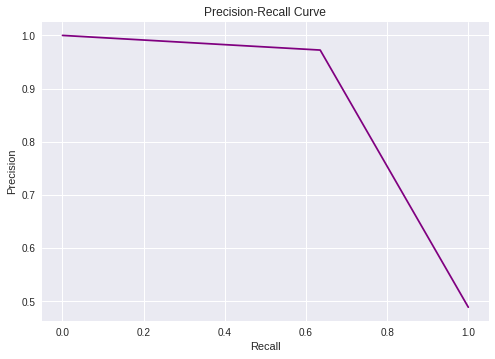

In [35]:
svm=superVector("linear",5,12)
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

# Precision & recall
confsuion_tree(y_test,y_test_svm )
precision=Presion(y_test,y_test_svm)
recall=Recall(y_test,y_test_svm)
#ROC
ROC(svm)
# PR_Curve
PR_Curve(y_test,y_test_svm,recall,precision)


SVM: Accuracy on training Data: 0.799
SVM : Accuracy on test Data: 0.813


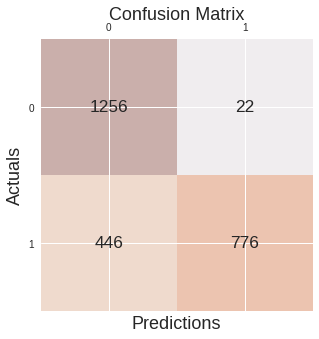

Precision: 0.972
Recall: 0.635
the roc auc is  0.8648080060651232


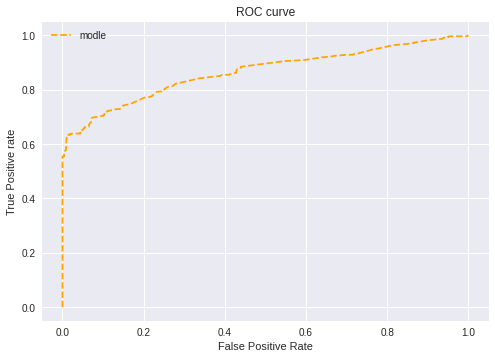

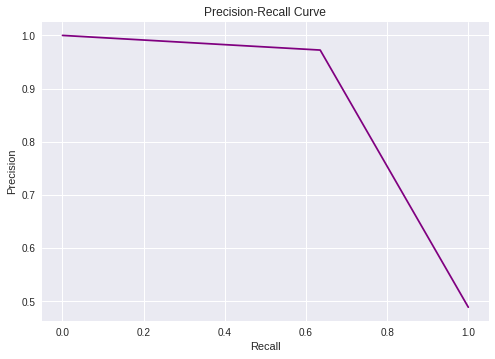

In [36]:
svm=superVector("linear",10,12)
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

# Precision & recall
confsuion_tree(y_test,y_test_svm )
precision=Presion(y_test,y_test_svm)
recall=Recall(y_test,y_test_svm)
#ROC
ROC(svm)
# PR_Curve
PR_Curve(y_test,y_test_svm,recall,precision)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1278
           1       0.87      0.80      0.83      1222

    accuracy                           0.84      2500
   macro avg       0.85      0.84      0.84      2500
weighted avg       0.85      0.84      0.84      2500



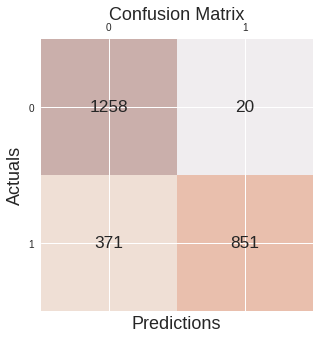

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1278
           1       0.90      0.78      0.84      1222

    accuracy                           0.85      2500
   macro avg       0.86      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



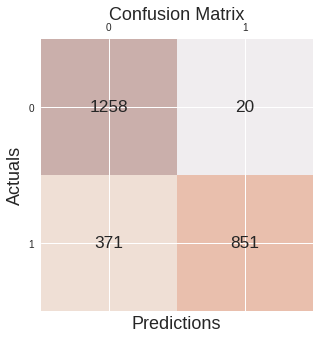

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1278
           1       0.90      0.78      0.83      1222

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



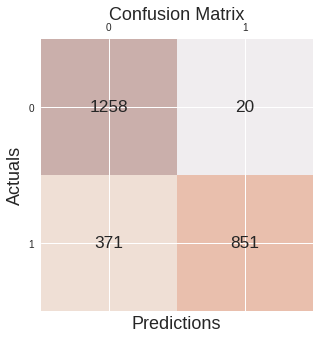

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1278
           1       0.94      0.74      0.83      1222

    accuracy                           0.85      2500
   macro avg       0.87      0.85      0.85      2500
weighted avg       0.87      0.85      0.85      2500



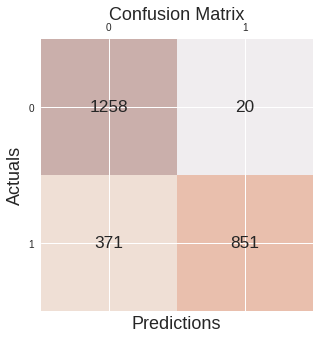

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      1278
           1       0.96      0.72      0.82      1222

    accuracy                           0.85      2500
   macro avg       0.87      0.85      0.85      2500
weighted avg       0.87      0.85      0.85      2500



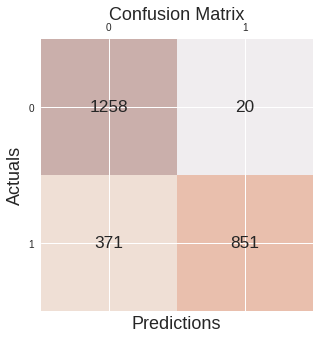

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1278
           1       0.97      0.70      0.82      1222

    accuracy                           0.85      2500
   macro avg       0.87      0.84      0.84      2500
weighted avg       0.87      0.85      0.84      2500



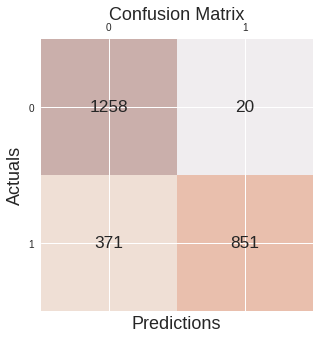

              precision    recall  f1-score   support

           0       0.77      0.98      0.87      1278
           1       0.98      0.70      0.82      1222

    accuracy                           0.85      2500
   macro avg       0.88      0.84      0.84      2500
weighted avg       0.87      0.85      0.84      2500



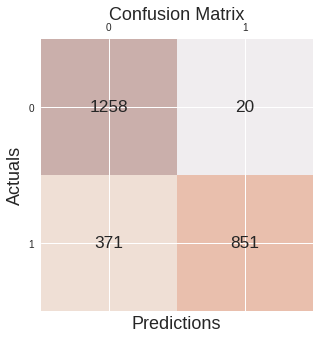

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1278
           1       0.98      0.70      0.81      1222

    accuracy                           0.84      2500
   macro avg       0.88      0.84      0.84      2500
weighted avg       0.87      0.84      0.84      2500



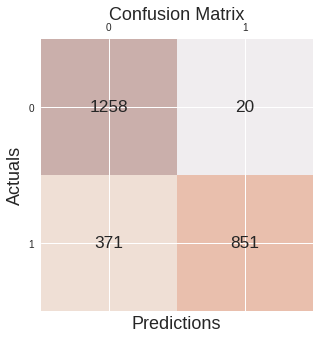

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1278
           1       0.98      0.69      0.81      1222

    accuracy                           0.84      2500
   macro avg       0.87      0.84      0.84      2500
weighted avg       0.87      0.84      0.84      2500



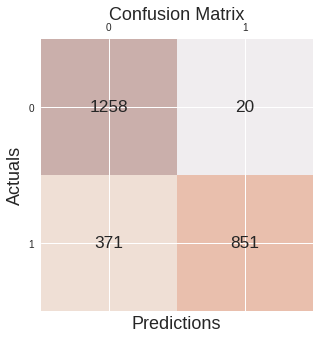

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1278
           1       0.98      0.69      0.81      1222

    accuracy                           0.84      2500
   macro avg       0.87      0.84      0.83      2500
weighted avg       0.87      0.84      0.84      2500



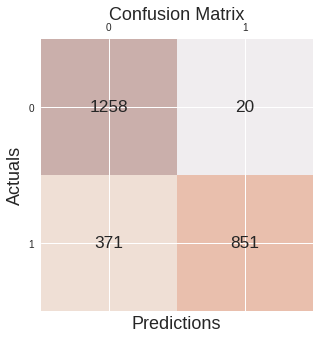

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1278
           1       0.98      0.67      0.80      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.83      0.83      2500
weighted avg       0.87      0.83      0.83      2500



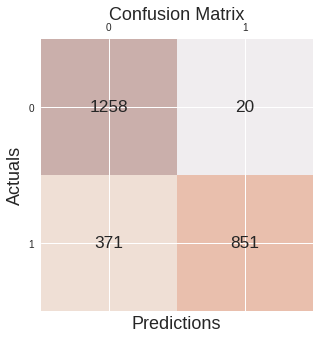

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1278
           1       0.99      0.67      0.79      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.83      0.83      2500
weighted avg       0.87      0.83      0.83      2500



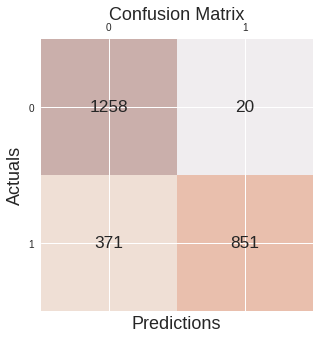

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1278
           1       0.99      0.65      0.78      1222

    accuracy                           0.82      2500
   macro avg       0.87      0.82      0.82      2500
weighted avg       0.87      0.82      0.82      2500



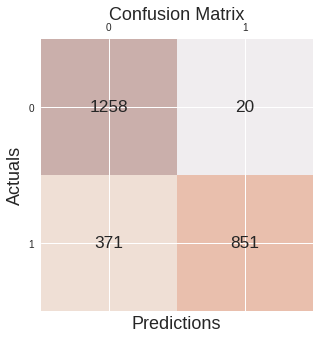

In [37]:
svm=superVector("rbf",5,12)
#predicting the target value from the model for the samples

start(svm)


SVM: Accuracy on training Data: 0.836
SVM : Accuracy on test Data: 0.844


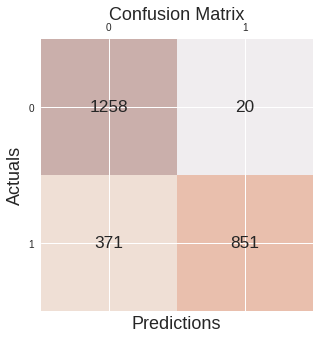

Precision: 0.977
Recall: 0.696
the roc auc is  0.8872227728985295


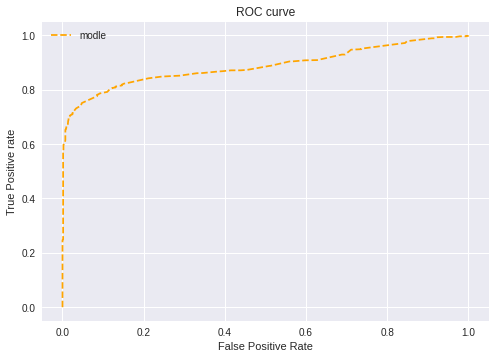

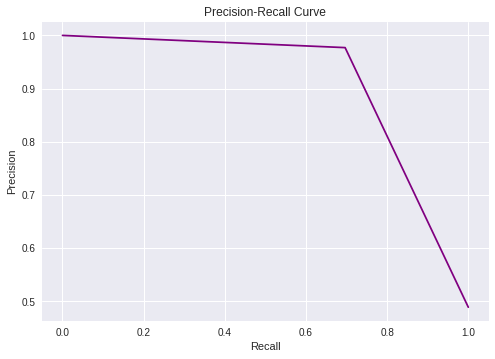

In [38]:
svm=superVector("rbf",5,12)
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

# Precision & recall
confsuion_tree(y_test,y_test_svm )
precision=Presion(y_test,y_test_svm)
recall=Recall(y_test,y_test_svm)
#ROC
ROC(svm)
# PR_Curve
PR_Curve(y_test,y_test_svm,recall,precision)

SVM: Accuracy on training Data: 0.840
SVM : Accuracy on test Data: 0.848


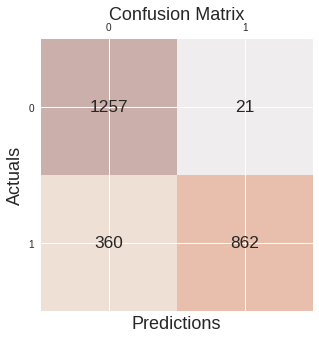

Precision: 0.976
Recall: 0.705
the roc auc is  0.8993645451541766


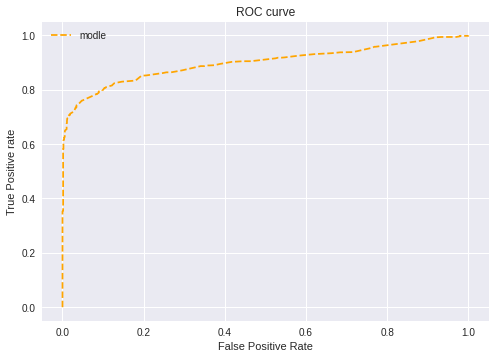

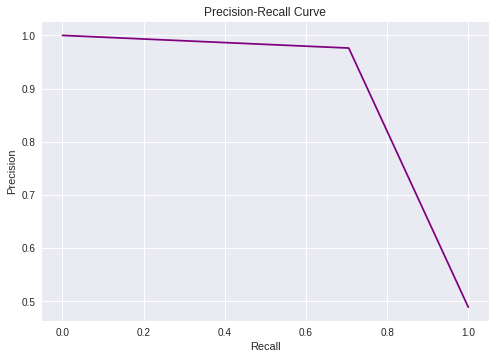

In [39]:
svm=superVector("rbf",10,12)
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

# Precision & recall
confsuion_tree(y_test,y_test_svm )
precision=Presion(y_test,y_test_svm)
recall=Recall(y_test,y_test_svm)
#ROC
ROC(svm)
# PR_Curve
PR_Curve(y_test,y_test_svm,recall,precision)

SVM: Accuracy on training Data: 0.816
SVM : Accuracy on test Data: 0.823


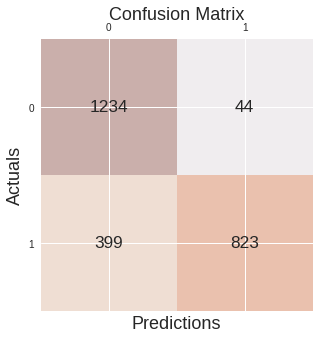

Precision: 0.949
Recall: 0.673
the roc auc is  0.8743420698769814


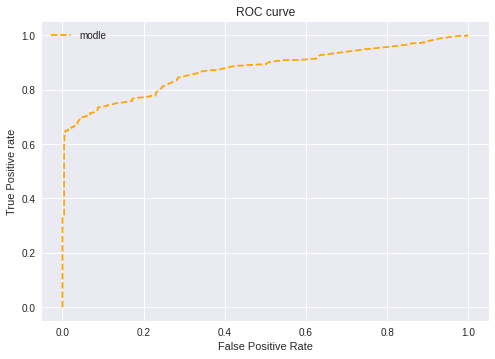

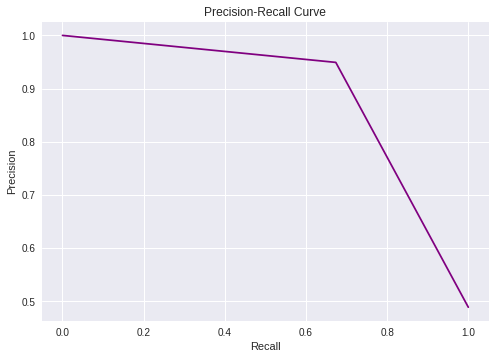

In [40]:
svm=superVector('poly',1,12)
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

# Precision & recall
confsuion_tree(y_test,y_test_svm )
precision=Presion(y_test,y_test_svm)
recall=Recall(y_test,y_test_svm)
#ROC
ROC(svm)
# PR_Curve
PR_Curve(y_test,y_test_svm,recall,precision)

SVM: Accuracy on training Data: 0.825
SVM : Accuracy on test Data: 0.831


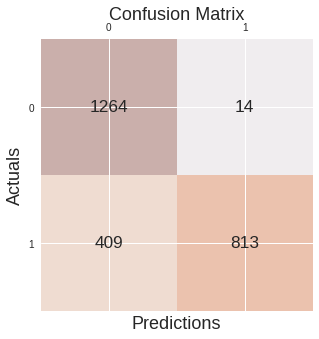

Precision: 0.983
Recall: 0.665
the roc auc is  0.8755433126125365


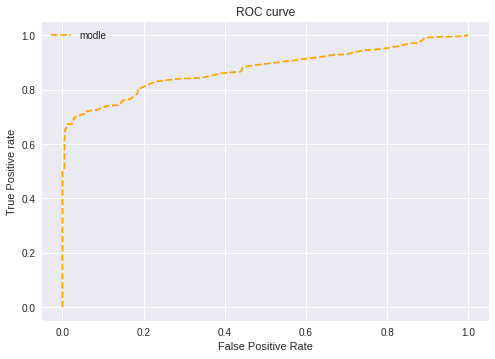

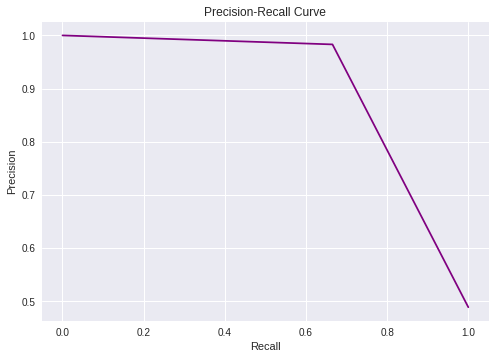

In [41]:
svm=superVector('poly',5,12)
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

# Precision & recall
confsuion_tree(y_test,y_test_svm )
precision=Presion(y_test,y_test_svm)
recall=Recall(y_test,y_test_svm)
#ROC
ROC(svm)
# PR_Curve
PR_Curve(y_test,y_test_svm,recall,precision)

In [42]:
from xgboost import XGBClassifier

def Xgb(learning_rate,max_depth):
# instantiate the model
  Xgb = XGBClassifier(learning_rate=learning_rate,max_depth=max_depth)
#fit the model
  Xgb.fit(X_train, y_train)

  return Xgb
     

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1278
           1       0.82      0.86      0.84      1222

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500



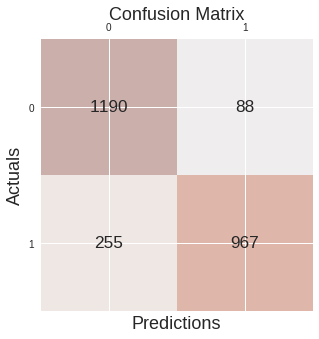

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1278
           1       0.87      0.83      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



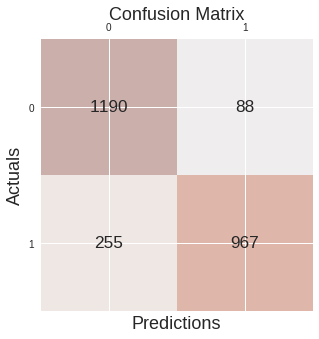

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1278
           1       0.91      0.81      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



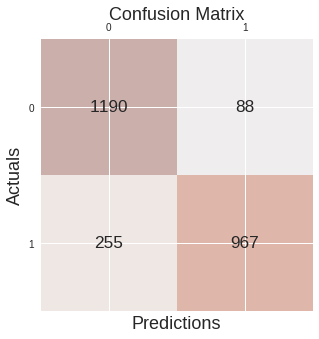

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1278
           1       0.91      0.80      0.85      1222

    accuracy                           0.87      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.87      0.86      2500



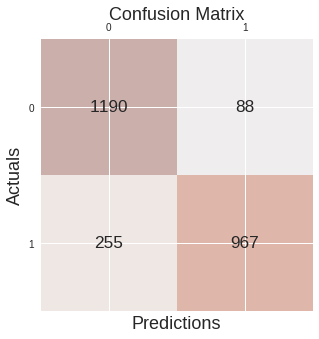

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1278
           1       0.92      0.79      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



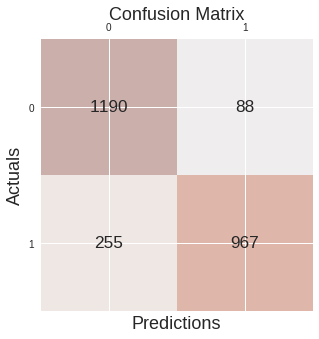

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1278
           1       0.96      0.74      0.84      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.86      0.86      2500
weighted avg       0.88      0.86      0.86      2500



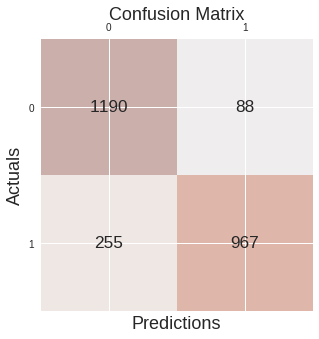

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1278
           1       0.97      0.73      0.84      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.86      0.86      2500
weighted avg       0.88      0.86      0.86      2500



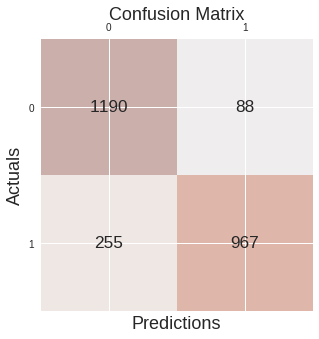

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1278
           1       0.98      0.73      0.83      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.86      0.86      2500
weighted avg       0.88      0.86      0.86      2500



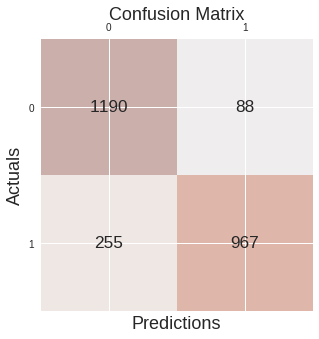

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1278
           1       0.99      0.71      0.83      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.85      0.85      2500
weighted avg       0.88      0.86      0.85      2500



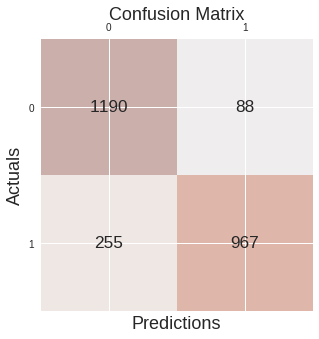

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1278
           1       0.99      0.71      0.83      1222

    accuracy                           0.85      2500
   macro avg       0.88      0.85      0.85      2500
weighted avg       0.88      0.85      0.85      2500



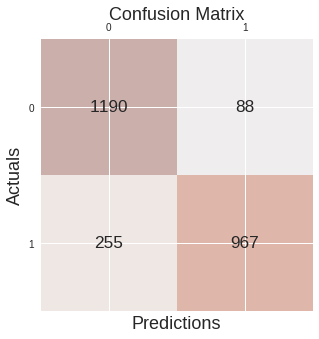

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1278
           1       0.99      0.69      0.81      1222

    accuracy                           0.85      2500
   macro avg       0.88      0.84      0.84      2500
weighted avg       0.88      0.85      0.84      2500



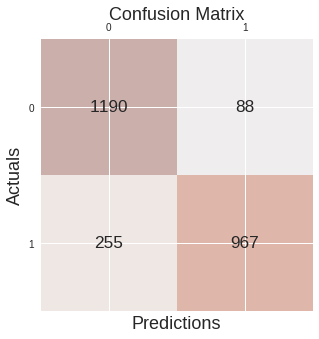

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1278
           1       0.99      0.68      0.80      1222

    accuracy                           0.84      2500
   macro avg       0.88      0.84      0.83      2500
weighted avg       0.87      0.84      0.83      2500



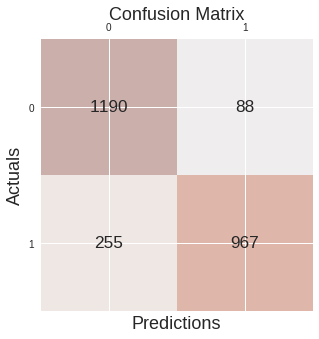

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1278
           1       1.00      0.64      0.78      1222

    accuracy                           0.82      2500
   macro avg       0.87      0.82      0.81      2500
weighted avg       0.87      0.82      0.81      2500



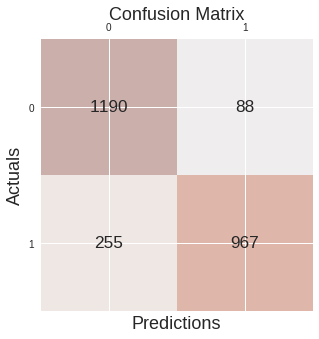

In [43]:
xgb=Xgb(0.4,10)
start(xgb)

SVM: Accuracy on training Data: 0.867
SVM : Accuracy on test Data: 0.864


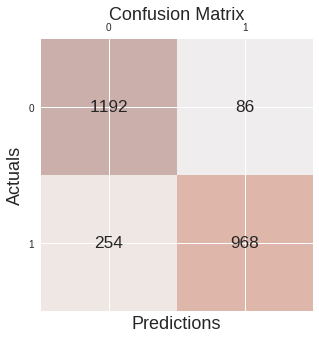

Precision: 0.918
Recall: 0.792
the roc auc is  0.8755433126125365


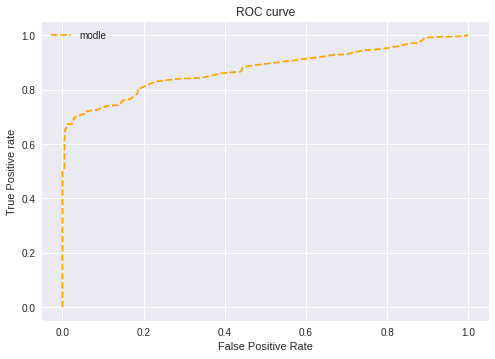

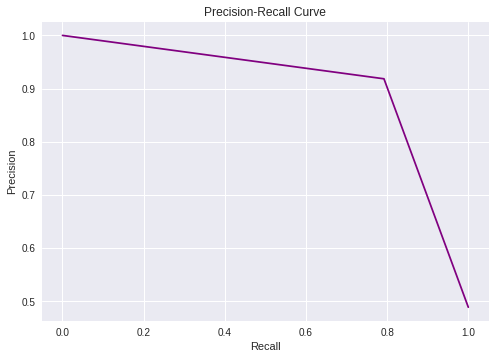

In [44]:
xgb=Xgb(0.4,7)
#predicting the target value from the model for the samples
y_test_svm = xgb.predict(X_test)
y_train_svm = xgb.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

# Precision & recall
confsuion_tree(y_test,y_test_svm )
precision=Presion(y_test,y_test_svm)
recall=Recall(y_test,y_test_svm)
#ROC
ROC(svm)
# PR_Curve
PR_Curve(y_test,y_test_svm,recall,precision)



Weighted Avg Accuracy: 83.360


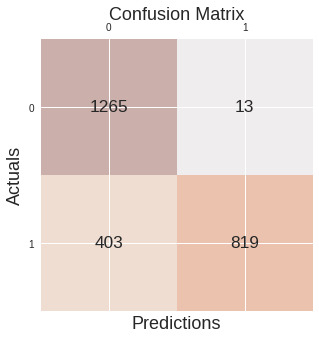

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1278
           1       0.95      0.73      0.83      1222

    accuracy                           0.85      2500
   macro avg       0.87      0.85      0.85      2500
weighted avg       0.87      0.85      0.85      2500



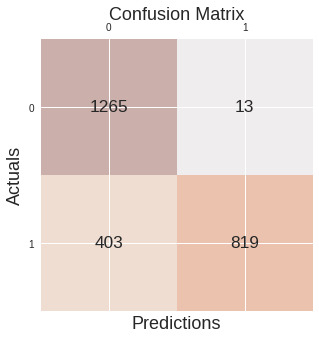

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1278
           1       0.97      0.72      0.83      1222

    accuracy                           0.85      2500
   macro avg       0.88      0.85      0.85      2500
weighted avg       0.87      0.85      0.85      2500



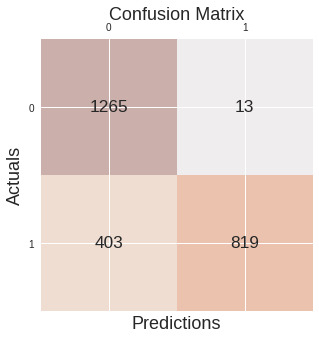

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1278
           1       0.97      0.71      0.82      1222

    accuracy                           0.85      2500
   macro avg       0.88      0.84      0.84      2500
weighted avg       0.87      0.85      0.84      2500



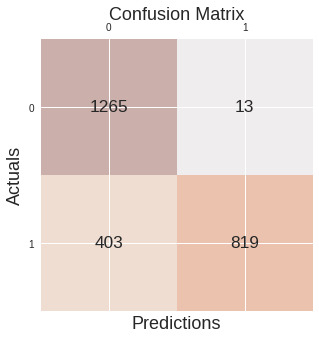

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1278
           1       0.98      0.69      0.81      1222

    accuracy                           0.84      2500
   macro avg       0.87      0.84      0.84      2500
weighted avg       0.87      0.84      0.84      2500



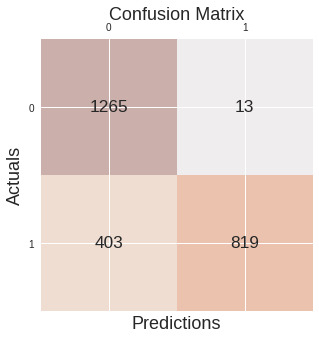

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1278
           1       0.98      0.67      0.80      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.83      0.83      2500
weighted avg       0.87      0.83      0.83      2500



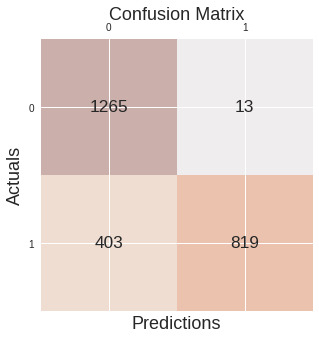

              precision    recall  f1-score   support

           0       0.75      0.99      0.86      1278
           1       0.99      0.66      0.79      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.83      0.82      2500
weighted avg       0.87      0.83      0.82      2500



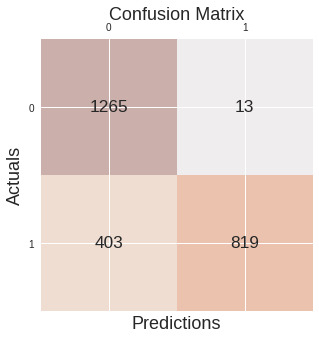

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      1278
           1       0.99      0.65      0.78      1222

    accuracy                           0.82      2500
   macro avg       0.87      0.82      0.82      2500
weighted avg       0.87      0.82      0.82      2500



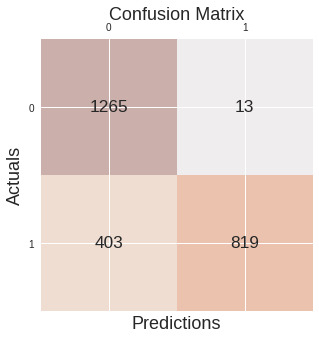

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1278
           1       0.99      0.60      0.75      1222

    accuracy                           0.80      2500
   macro avg       0.86      0.80      0.79      2500
weighted avg       0.85      0.80      0.79      2500



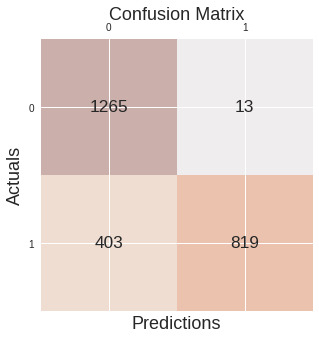

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1278
           1       0.99      0.60      0.75      1222

    accuracy                           0.80      2500
   macro avg       0.86      0.80      0.79      2500
weighted avg       0.85      0.80      0.79      2500



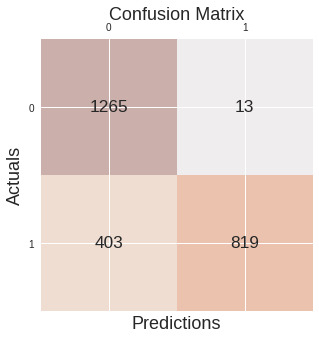

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1278
           1       0.99      0.60      0.75      1222

    accuracy                           0.80      2500
   macro avg       0.86      0.80      0.79      2500
weighted avg       0.85      0.80      0.79      2500



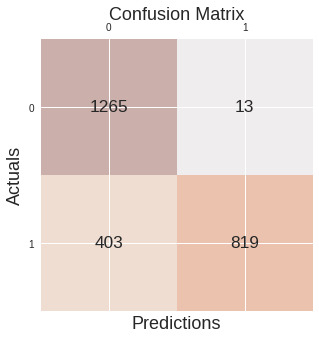

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1278
           1       0.99      0.60      0.75      1222

    accuracy                           0.80      2500
   macro avg       0.86      0.80      0.79      2500
weighted avg       0.85      0.80      0.79      2500



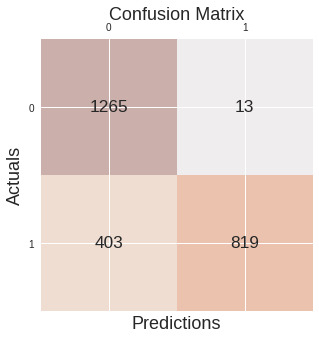

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1278
           1       1.00      0.59      0.75      1222

    accuracy                           0.80      2500
   macro avg       0.86      0.80      0.79      2500
weighted avg       0.86      0.80      0.79      2500



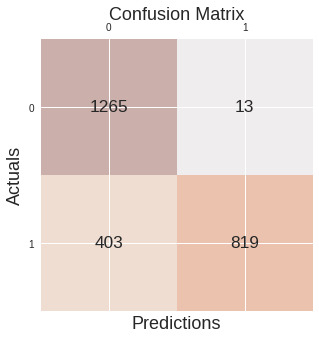

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1278
           1       1.00      0.58      0.73      1222

    accuracy                           0.79      2500
   macro avg       0.86      0.79      0.78      2500
weighted avg       0.85      0.79      0.78      2500



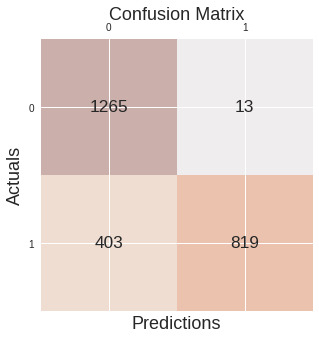

In [45]:
# evaluate a weighted average ensemble for classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
 
# get a list of base models
def get_models():
 models = list()
 models.append(('SVC', SVC(kernel="rbf", C=10, random_state=12,probability=True)))
 models.append(('cart', DecisionTreeClassifier(max_depth =10)))
 models.append(('bayes', GaussianNB()))
 return models
 
# evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
  # fit and evaluate the models
  scores = list()
  for name, model in models:
   
  # fit the model
    model.fit(X_train, y_train)
    # evaluate the model
    yhat = model.predict(X_val)
    acc = accuracy_score(y_val, yhat)
    # store the performance
    scores.append(acc)
    # report model performance
  return scores

# create the base models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
# fit the ensemble on the training dataset
ensemble.fit(X_train, y_train)
# make predictions on test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Weighted Avg Accuracy: %.3f' % (score*100))
confsuion_tree(y_test,yhat)
start(ensemble)

In [46]:
# example from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html 
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
 

# Instantiate model
clf = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=1.0,
    max_depth=1, 
    random_state=0)
 
# Train model
clf.fit(X_train, y_train)
 
# Evaluate
clf.score(X_test, y_test)

0.8076

In [57]:
# evaluate a weighted average ensemble for classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
 
# get a list of base models
def get_models():
 models = list()
 models.append(('SVC', SVC(kernel="rbf", C=10, random_state=12,probability=True)))
 models.append(('cart', DecisionTreeClassifier(max_depth =10)))
 models.append(('bayes', RandomForestClassifier(max_depth=15)))
 models.append(("xgb",Xgb(0.4,7)))
 return models
 
# evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
  # fit and evaluate the models
  scores = list()
  for name, model in models:
   
  # fit the model
    model.fit(X_train, y_train)
    # evaluate the model
    yhat = model.predict(X_val)
    acc = accuracy_score(y_val, yhat)
    # store the performance
    scores.append(acc)
    # report model performance
  return scores

# create the base models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='hard', weights=scores)
# fit the ensemble on the training dataset
ensemble.fit(X_train, y_train)
# make predictions on test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Weighted Avg Accuracy: %.3f' % (score*100))
classification_report(y_test,yhat)




Weighted Avg Accuracy: 86.320


'              precision    recall  f1-score   support\n\n           0       0.81      0.95      0.88      1278\n           1       0.94      0.77      0.85      1222\n\n    accuracy                           0.86      2500\n   macro avg       0.87      0.86      0.86      2500\nweighted avg       0.87      0.86      0.86      2500\n'

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1278
           1       0.87      0.82      0.84      1222

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



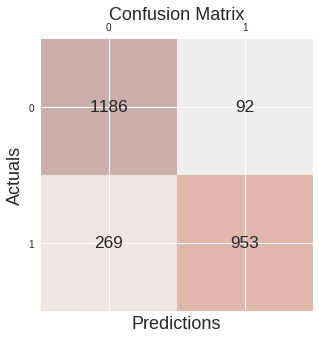

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1278
           1       0.88      0.81      0.84      1222

    accuracy                           0.85      2500
   macro avg       0.86      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



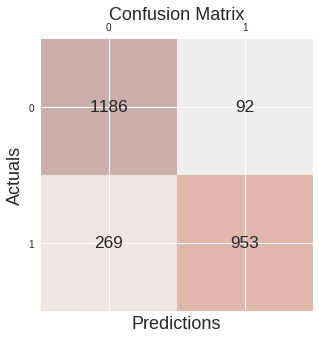

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1278
           1       0.89      0.81      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



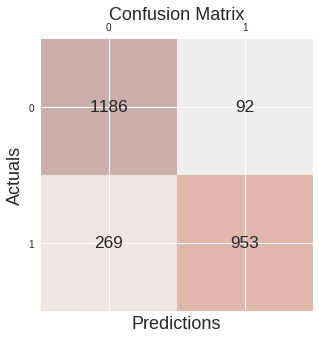

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1278
           1       0.90      0.80      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



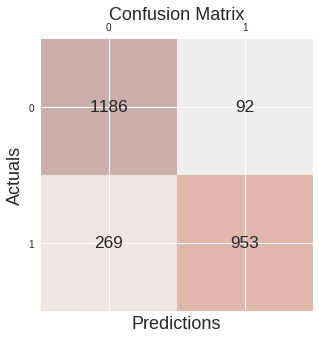

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1278
           1       0.91      0.78      0.84      1222

    accuracy                           0.86      2500
   macro avg       0.86      0.85      0.85      2500
weighted avg       0.86      0.86      0.85      2500



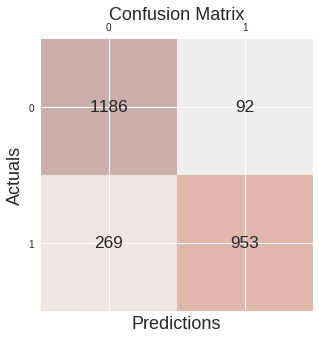

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1278
           1       0.96      0.73      0.83      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.85      0.85      2500
weighted avg       0.88      0.86      0.85      2500



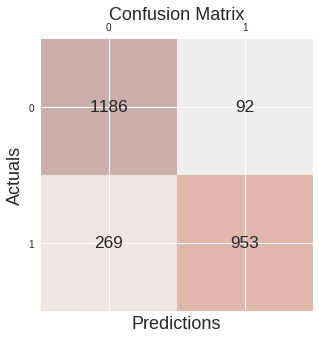

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1278
           1       0.97      0.72      0.83      1222

    accuracy                           0.85      2500
   macro avg       0.88      0.85      0.85      2500
weighted avg       0.88      0.85      0.85      2500



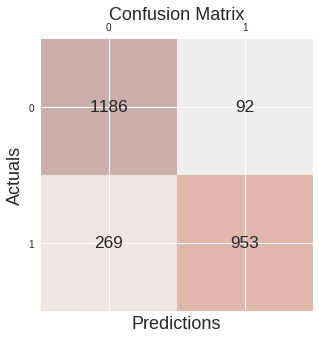

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1278
           1       0.98      0.71      0.82      1222

    accuracy                           0.85      2500
   macro avg       0.88      0.85      0.85      2500
weighted avg       0.88      0.85      0.85      2500



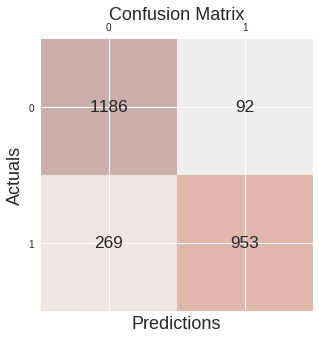

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1278
           1       0.98      0.70      0.82      1222

    accuracy                           0.85      2500
   macro avg       0.88      0.84      0.84      2500
weighted avg       0.88      0.85      0.84      2500



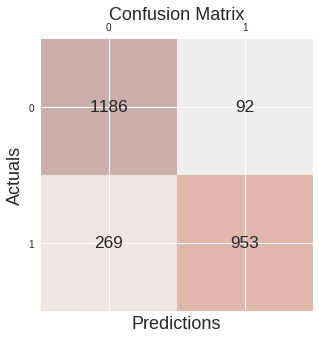

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1278
           1       0.99      0.68      0.81      1222

    accuracy                           0.84      2500
   macro avg       0.88      0.84      0.84      2500
weighted avg       0.87      0.84      0.84      2500



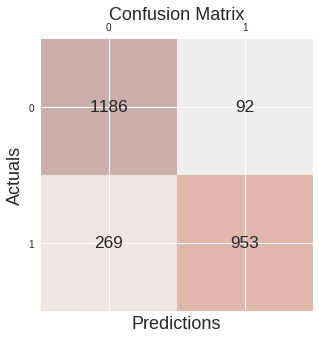

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1278
           1       0.99      0.67      0.80      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.83      0.83      2500
weighted avg       0.87      0.83      0.83      2500



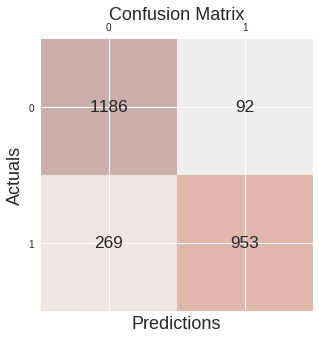

              precision    recall  f1-score   support

           0       0.75      0.99      0.86      1278
           1       0.99      0.66      0.79      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.83      0.82      2500
weighted avg       0.87      0.83      0.82      2500



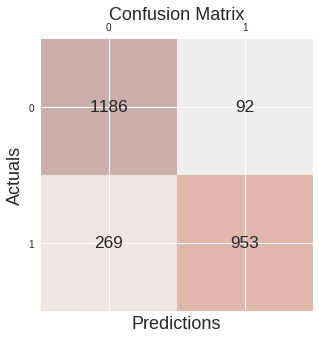

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1278
           1       0.99      0.64      0.78      1222

    accuracy                           0.82      2500
   macro avg       0.87      0.82      0.82      2500
weighted avg       0.87      0.82      0.82      2500



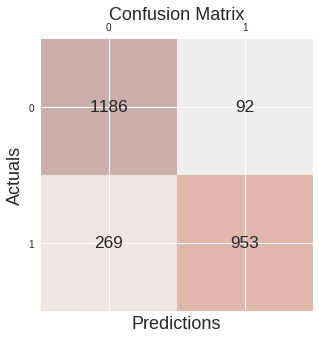

In [58]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier(max_depth =10)))
level0.append(('SVC', SVC(kernel="rbf", C=10, random_state=12,probability=True)))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model=model.fit(X_train, y_train)
# make a prediction for one example

y_preditc = model.predict(X_test)

score = accuracy_score(y_test, y_preditc)



start(model)

Weighted Avg Accuracy: 86.400
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1278
           1       0.82      0.86      0.84      1222

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500



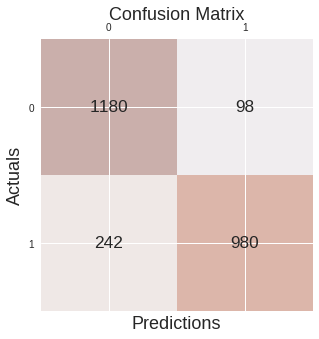

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1278
           1       0.86      0.84      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



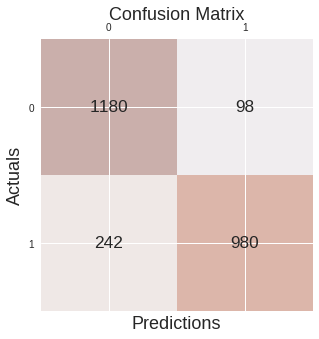

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1278
           1       0.90      0.81      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



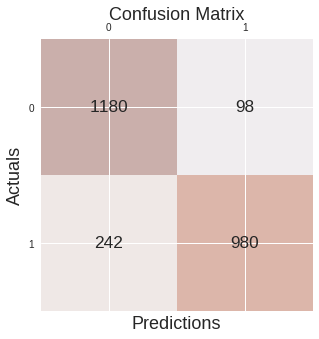

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1278
           1       0.90      0.81      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



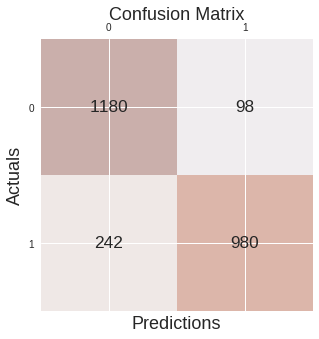

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1278
           1       0.91      0.80      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



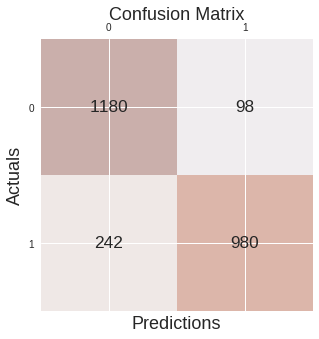

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1278
           1       0.92      0.78      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



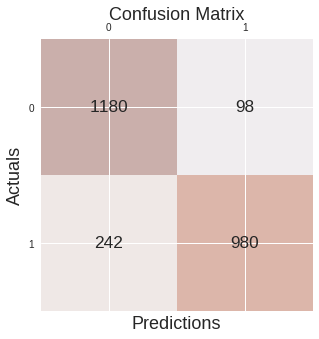

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1278
           1       0.93      0.76      0.84      1222

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



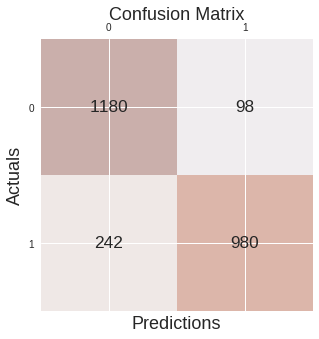

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1278
           1       0.96      0.73      0.83      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.85      0.85      2500
weighted avg       0.88      0.86      0.85      2500



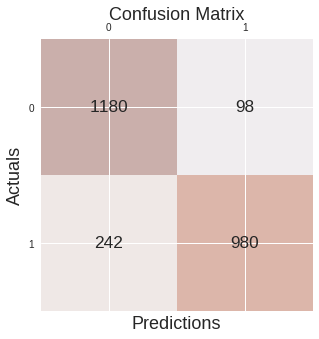

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1278
           1       0.98      0.72      0.83      1222

    accuracy                           0.85      2500
   macro avg       0.88      0.85      0.85      2500
weighted avg       0.88      0.85      0.85      2500



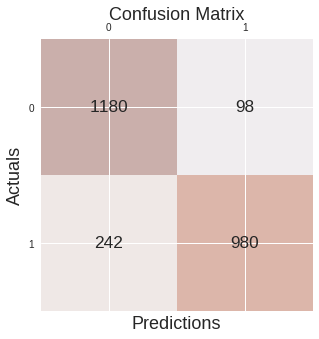

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1278
           1       0.98      0.69      0.81      1222

    accuracy                           0.84      2500
   macro avg       0.87      0.84      0.84      2500
weighted avg       0.87      0.84      0.84      2500



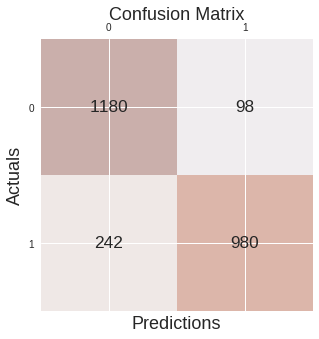

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1278
           1       0.99      0.68      0.80      1222

    accuracy                           0.84      2500
   macro avg       0.87      0.84      0.83      2500
weighted avg       0.87      0.84      0.83      2500



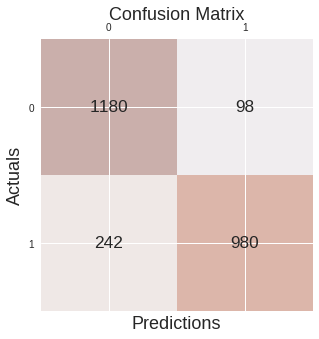

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1278
           1       0.99      0.67      0.80      1222

    accuracy                           0.83      2500
   macro avg       0.87      0.83      0.83      2500
weighted avg       0.87      0.83      0.83      2500



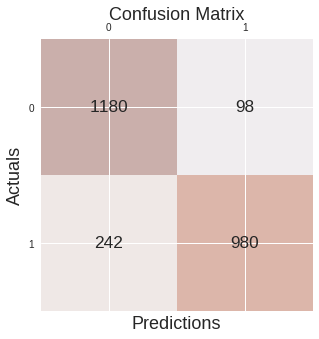

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1278
           1       0.99      0.64      0.78      1222

    accuracy                           0.82      2500
   macro avg       0.87      0.82      0.81      2500
weighted avg       0.87      0.82      0.81      2500



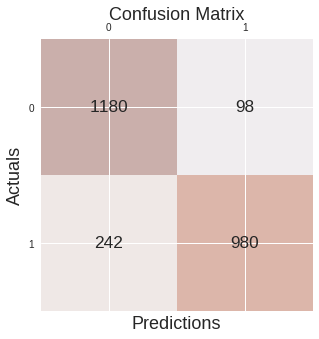

In [61]:


# define the base models
level0 = list()
level0.append(('cart', DecisionTreeClassifier(max_depth =10)))
level0.append(('SVC', SVC(kernel="rbf", C=10, random_state=12,probability=True)))
level0.append(('bayes', GaussianNB()))
level0.append(('boost', GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_depth=31, random_state=4)))
# define meta learner model
level1 = RandomForestClassifier(max_depth=15)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model=model.fit(X_train, y_train)
# make a prediction for one example

y_preditc = model.predict(X_test)

score = accuracy_score(y_test, y_preditc)
print('Weighted Avg Accuracy: %.3f' % (score*100))

start(model)


Weighted Avg Accuracy: 0.856
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1278
           1       0.85      0.84      0.85      1222

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



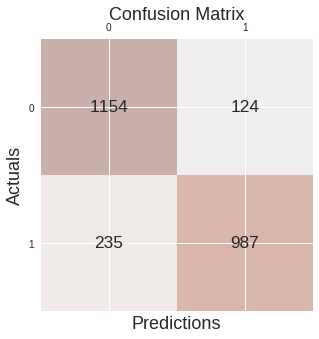

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1278
           1       0.85      0.84      0.85      1222

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



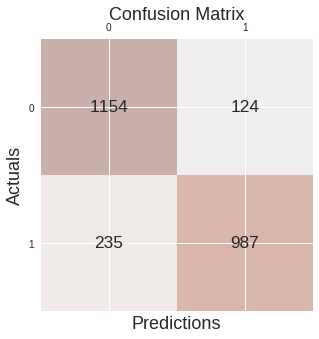

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1278
           1       0.88      0.81      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



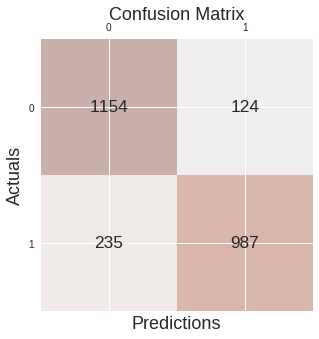

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1278
           1       0.88      0.81      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



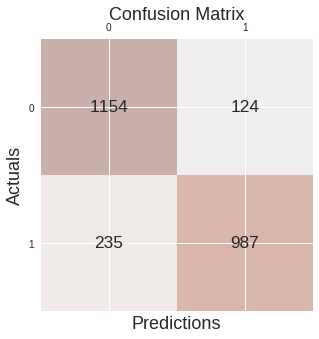

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1278
           1       0.89      0.81      0.85      1222

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



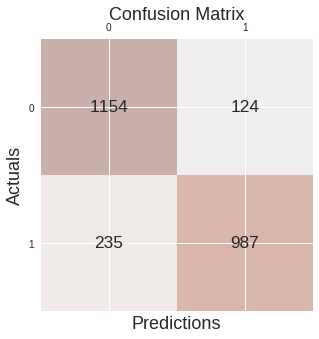

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1278
           1       0.95      0.76      0.84      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.86      0.86      2500
weighted avg       0.88      0.86      0.86      2500



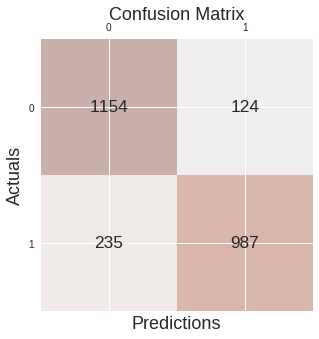

              precision    recall  f1-score   support

           0       0.80      0.96      0.88      1278
           1       0.95      0.75      0.84      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.86      0.86      2500
weighted avg       0.88      0.86      0.86      2500



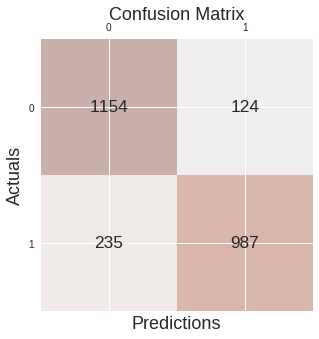

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1278
           1       0.96      0.74      0.84      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.86      0.86      2500
weighted avg       0.88      0.86      0.86      2500



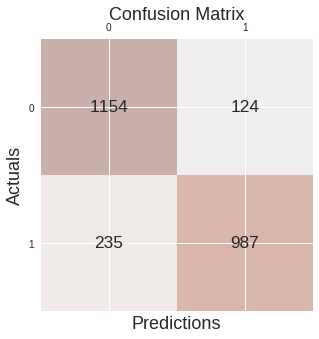

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1278
           1       0.97      0.73      0.83      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.86      0.86      2500
weighted avg       0.88      0.86      0.86      2500



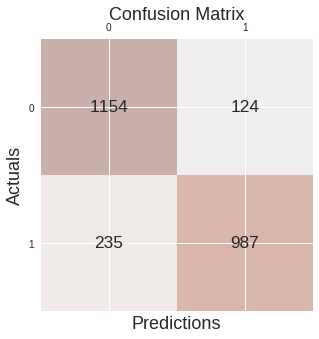

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1278
           1       0.97      0.73      0.83      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.85      0.85      2500
weighted avg       0.88      0.86      0.86      2500



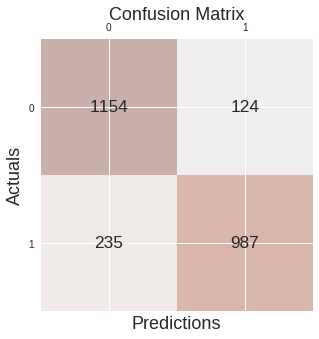

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1278
           1       0.98      0.72      0.83      1222

    accuracy                           0.86      2500
   macro avg       0.88      0.85      0.85      2500
weighted avg       0.88      0.86      0.85      2500



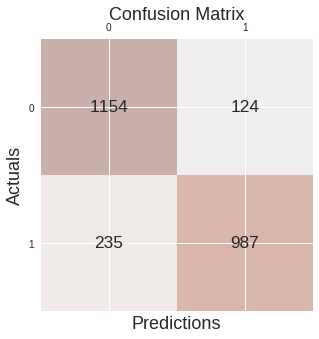

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1278
           1       0.99      0.71      0.82      1222

    accuracy                           0.85      2500
   macro avg       0.88      0.85      0.85      2500
weighted avg       0.88      0.85      0.85      2500



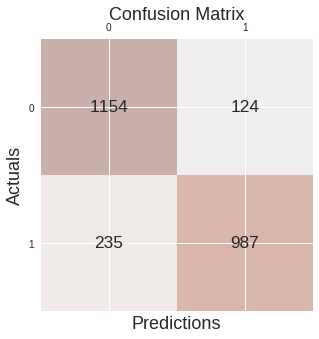

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1278
           1       0.99      0.70      0.82      1222

    accuracy                           0.85      2500
   macro avg       0.88      0.84      0.84      2500
weighted avg       0.88      0.85      0.84      2500



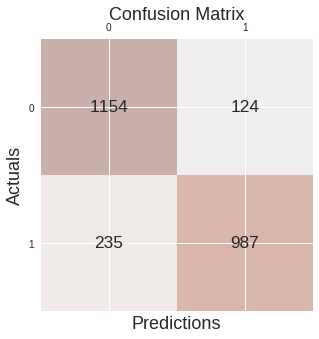

In [62]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# define the base models
level0 = list()

level0.append(('cart', DecisionTreeClassifier(max_depth =10)))
level0.append(('SVC', SVC(kernel="rbf", C=10, random_state=12,probability=True)))
level0.append(('bayes', GaussianNB()))
level0.append(('rf', RandomForestClassifier(max_depth=15)))


level1=Xgb(0.4,7)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model=model.fit(X_train, y_train)
# make a prediction for one example

y_preditc = model.predict(X_test)

score = accuracy_score(y_test, y_preditc)
print('Weighted Avg Accuracy: %.3f' % (score))

classification_report(y_test,yhat)
start(model)

Train score: 0.7788
Test score: 0.7788
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1278
           1       0.73      0.83      0.77      1222

    accuracy                           0.76      2500
   macro avg       0.77      0.76      0.76      2500
weighted avg       0.77      0.76      0.76      2500



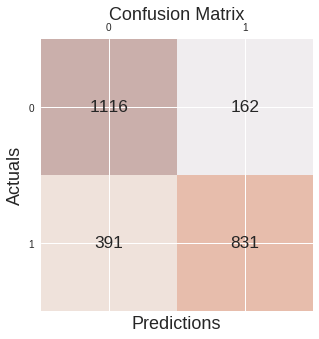

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1278
           1       0.73      0.81      0.77      1222

    accuracy                           0.76      2500
   macro avg       0.76      0.76      0.76      2500
weighted avg       0.76      0.76      0.76      2500



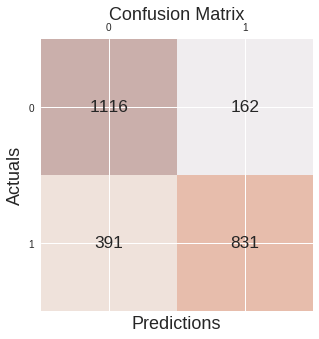

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1278
           1       0.76      0.79      0.77      1222

    accuracy                           0.77      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.77      0.77      0.77      2500



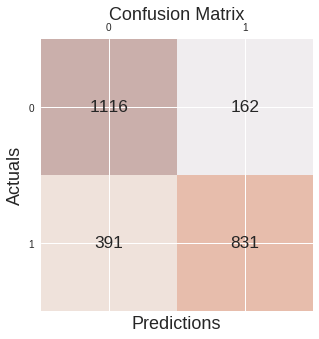

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1278
           1       0.77      0.74      0.76      1222

    accuracy                           0.76      2500
   macro avg       0.76      0.76      0.76      2500
weighted avg       0.76      0.76      0.76      2500



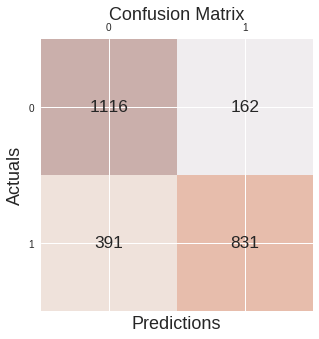

              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1278
           1       0.84      0.68      0.75      1222

    accuracy                           0.78      2500
   macro avg       0.79      0.78      0.78      2500
weighted avg       0.79      0.78      0.78      2500



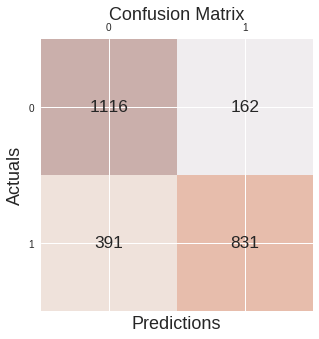

              precision    recall  f1-score   support

           0       0.73      0.95      0.82      1278
           1       0.92      0.62      0.74      1222

    accuracy                           0.79      2500
   macro avg       0.82      0.79      0.78      2500
weighted avg       0.82      0.79      0.78      2500



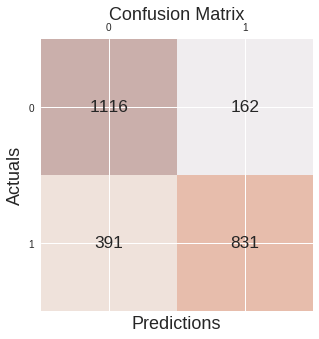

              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1278
           1       0.98      0.55      0.70      1222

    accuracy                           0.77      2500
   macro avg       0.84      0.77      0.76      2500
weighted avg       0.83      0.77      0.76      2500



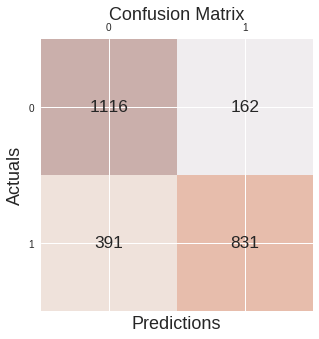

              precision    recall  f1-score   support

           0       0.69      0.99      0.82      1278
           1       0.98      0.54      0.70      1222

    accuracy                           0.77      2500
   macro avg       0.84      0.77      0.76      2500
weighted avg       0.83      0.77      0.76      2500



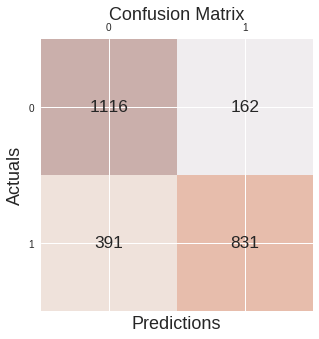

              precision    recall  f1-score   support

           0       0.69      0.99      0.81      1278
           1       0.98      0.53      0.69      1222

    accuracy                           0.77      2500
   macro avg       0.84      0.76      0.75      2500
weighted avg       0.83      0.77      0.75      2500



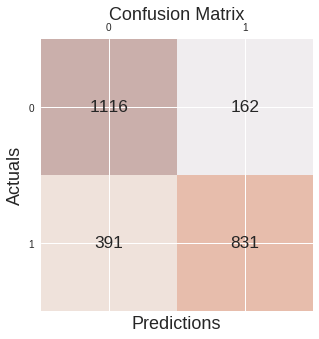

              precision    recall  f1-score   support

           0       0.69      0.99      0.81      1278
           1       0.98      0.52      0.68      1222

    accuracy                           0.76      2500
   macro avg       0.83      0.76      0.75      2500
weighted avg       0.83      0.76      0.75      2500



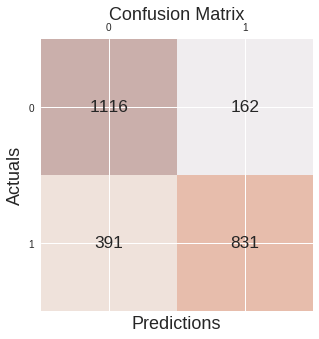

              precision    recall  f1-score   support

           0       0.68      0.99      0.81      1278
           1       0.99      0.50      0.67      1222

    accuracy                           0.75      2500
   macro avg       0.83      0.75      0.74      2500
weighted avg       0.83      0.75      0.74      2500



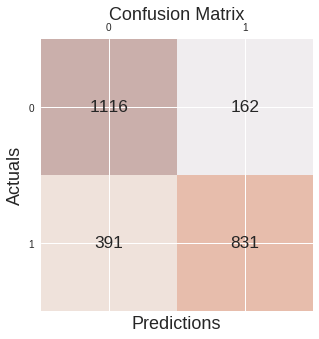

              precision    recall  f1-score   support

           0       0.68      0.99      0.81      1278
           1       0.99      0.50      0.67      1222

    accuracy                           0.75      2500
   macro avg       0.83      0.75      0.74      2500
weighted avg       0.83      0.75      0.74      2500



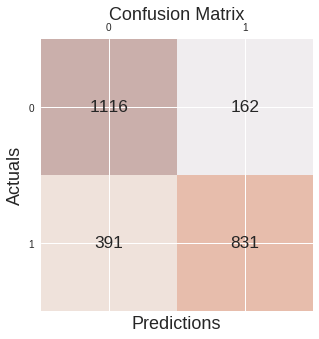

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1278
           1       1.00      0.49      0.66      1222

    accuracy                           0.75      2500
   macro avg       0.84      0.74      0.73      2500
weighted avg       0.83      0.75      0.73      2500



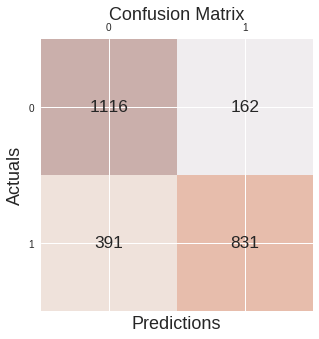

In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(X_train, y_train)


# Evaluating
print(f"Train score: {bagging.score(X_train, y_train)}")
print(f"Test score: {bagging.score(X_test, y_test)}")


start(bagging)

Train score: 0.7886666666666666
Test score: 0.796
              precision    recall  f1-score   support

           0       0.78      0.36      0.49      1278
           1       0.57      0.90      0.70      1222

    accuracy                           0.62      2500
   macro avg       0.68      0.63      0.60      2500
weighted avg       0.68      0.62      0.59      2500



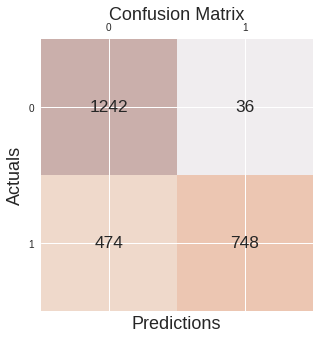

              precision    recall  f1-score   support

           0       0.77      0.56      0.65      1278
           1       0.64      0.83      0.72      1222

    accuracy                           0.69      2500
   macro avg       0.71      0.69      0.69      2500
weighted avg       0.71      0.69      0.69      2500



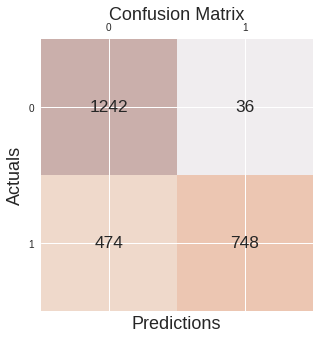

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1278
           1       0.77      0.71      0.74      1222

    accuracy                           0.75      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.75      0.75      0.75      2500



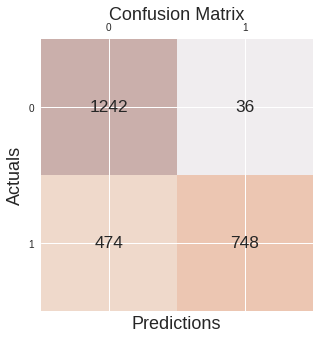

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1278
           1       0.81      0.66      0.73      1222

    accuracy                           0.76      2500
   macro avg       0.77      0.76      0.76      2500
weighted avg       0.77      0.76      0.76      2500



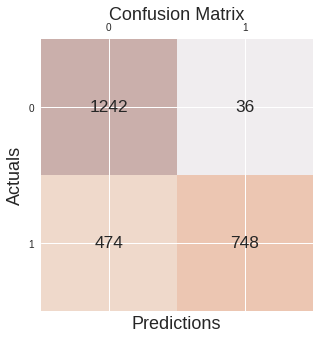

              precision    recall  f1-score   support

           0       0.72      0.97      0.83      1278
           1       0.95      0.61      0.75      1222

    accuracy                           0.80      2500
   macro avg       0.84      0.79      0.79      2500
weighted avg       0.84      0.80      0.79      2500



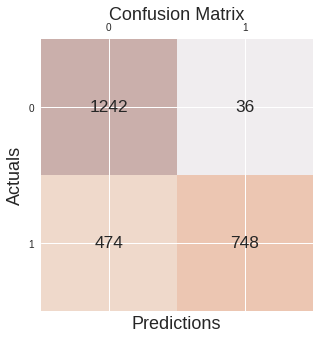

              precision    recall  f1-score   support

           0       0.71      0.98      0.82      1278
           1       0.96      0.58      0.73      1222

    accuracy                           0.78      2500
   macro avg       0.84      0.78      0.77      2500
weighted avg       0.83      0.78      0.78      2500



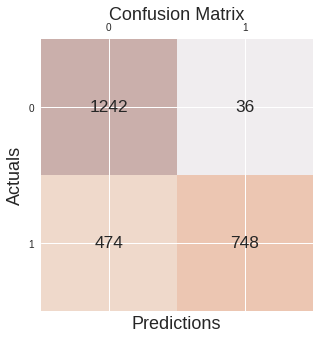

              precision    recall  f1-score   support

           0       0.71      0.99      0.82      1278
           1       0.97      0.58      0.72      1222

    accuracy                           0.79      2500
   macro avg       0.84      0.78      0.77      2500
weighted avg       0.84      0.79      0.78      2500



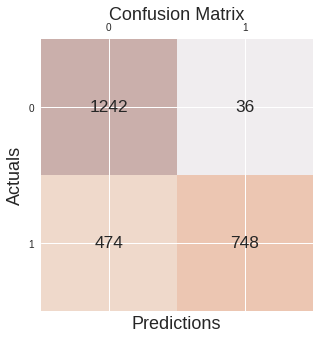

              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1278
           1       0.99      0.56      0.72      1222

    accuracy                           0.78      2500
   macro avg       0.84      0.78      0.77      2500
weighted avg       0.84      0.78      0.77      2500



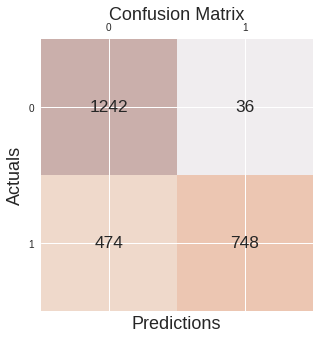

              precision    recall  f1-score   support

           0       0.69      0.99      0.82      1278
           1       0.99      0.54      0.70      1222

    accuracy                           0.77      2500
   macro avg       0.84      0.77      0.76      2500
weighted avg       0.84      0.77      0.76      2500



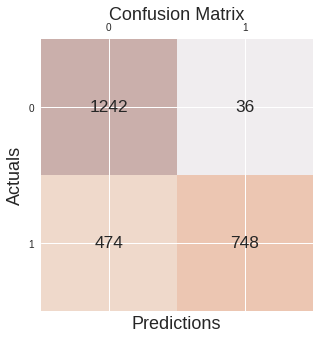

              precision    recall  f1-score   support

           0       0.66      0.99      0.79      1278
           1       0.99      0.47      0.64      1222

    accuracy                           0.74      2500
   macro avg       0.82      0.73      0.72      2500
weighted avg       0.82      0.74      0.72      2500



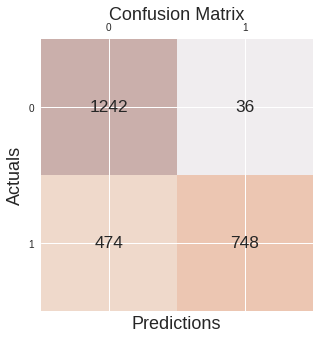

              precision    recall  f1-score   support

           0       0.66      1.00      0.80      1278
           1       0.99      0.47      0.64      1222

    accuracy                           0.74      2500
   macro avg       0.83      0.73      0.72      2500
weighted avg       0.82      0.74      0.72      2500



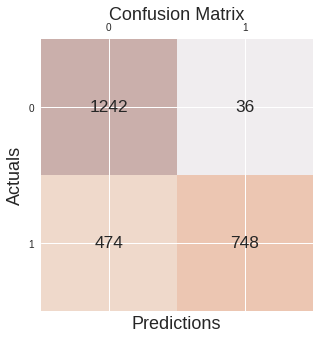

              precision    recall  f1-score   support

           0       0.66      1.00      0.80      1278
           1       1.00      0.47      0.64      1222

    accuracy                           0.74      2500
   macro avg       0.83      0.73      0.72      2500
weighted avg       0.83      0.74      0.72      2500



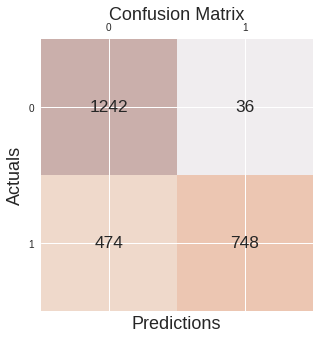

              precision    recall  f1-score   support

           0       0.66      1.00      0.80      1278
           1       1.00      0.46      0.63      1222

    accuracy                           0.74      2500
   macro avg       0.83      0.73      0.71      2500
weighted avg       0.83      0.74      0.71      2500



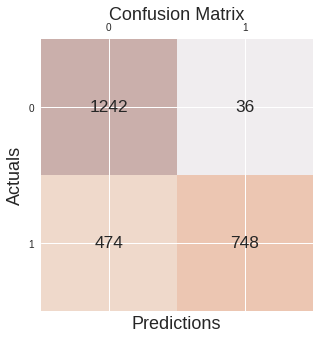

In [64]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(max_depth=5)
adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=5, learning_rate=0.1, random_state=23)

# Training
bagging.fit(X_train, y_train)


# Evaluating
print(f"Train score: {bagging.score(X_train, y_train)}")
print(f"Test score: {bagging.score(X_test, y_test)}")

start(bagging)

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoosting = GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_depth=31, random_state=4)

# Train!
gradientBoosting.fit(X_train, y_train)

# Evaluation
print(f"Train score: {gradientBoosting.score(X_train, y_train)}")
print(f"Test score: {gradientBoosting.score(X_test, y_test)}")


Train score: 0.868
Test score: 0.8616
